 # Used Car Price Prediction





#####  변수설명 
* Name : The brand and model of the car.
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type 
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.
* Price


## 데이터 적재 및 파악

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 행렬
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 출력화면
from IPython.display import set_matplotlib_formats
mpl.rc('font',family='Malgun Gothic')
mpl.rc('axes',unicode_minus=False)
set_matplotlib_formats('retina')

from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# DF option
pd.set_option('display.max.colwidth',100)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# multiline print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# warning 표시 off
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Github정리/Kaggle - used-cars-price-prediction/data/used-cars-price-prediction/train-data.csv',sep=',')
# Unnamed 칼럼 drop
train.drop('Unnamed: 0',axis=1,inplace=True)
# 칼럼 명 소문자
train.columns = map(str.lower, train.columns)
train.head()

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               6019 non-null   object 
 1   location           6019 non-null   object 
 2   year               6019 non-null   int64  
 3   kilometers_driven  6019 non-null   int64  
 4   fuel_type          6019 non-null   object 
 5   transmission       6019 non-null   object 
 6   owner_type         6019 non-null   object 
 7   mileage            6017 non-null   object 
 8   engine             5983 non-null   object 
 9   power              5983 non-null   object 
 10  seats              5977 non-null   float64
 11  new_price          824 non-null    object 
 12  price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [5]:
# 연속형 변수
print(train.describe().columns)
# 범주형 변수
print(train.describe(include='object').columns)

Index(['year', 'kilometers_driven', 'seats', 'price'], dtype='object')
Index(['name', 'location', 'fuel_type', 'transmission', 'owner_type',
       'mileage', 'engine', 'power', 'new_price'],
      dtype='object')


In [6]:
# 결측치 확인
train.isna().sum()

name                    0
location                0
year                    0
kilometers_driven       0
fuel_type               0
transmission            0
owner_type              0
mileage                 2
engine                 36
power                  36
seats                  42
new_price            5195
price                   0
dtype: int64

### EDA + Preprocessing

#### Target 변수(Price) 분포 확인

Text(0.5, 0, 'price')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Price')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


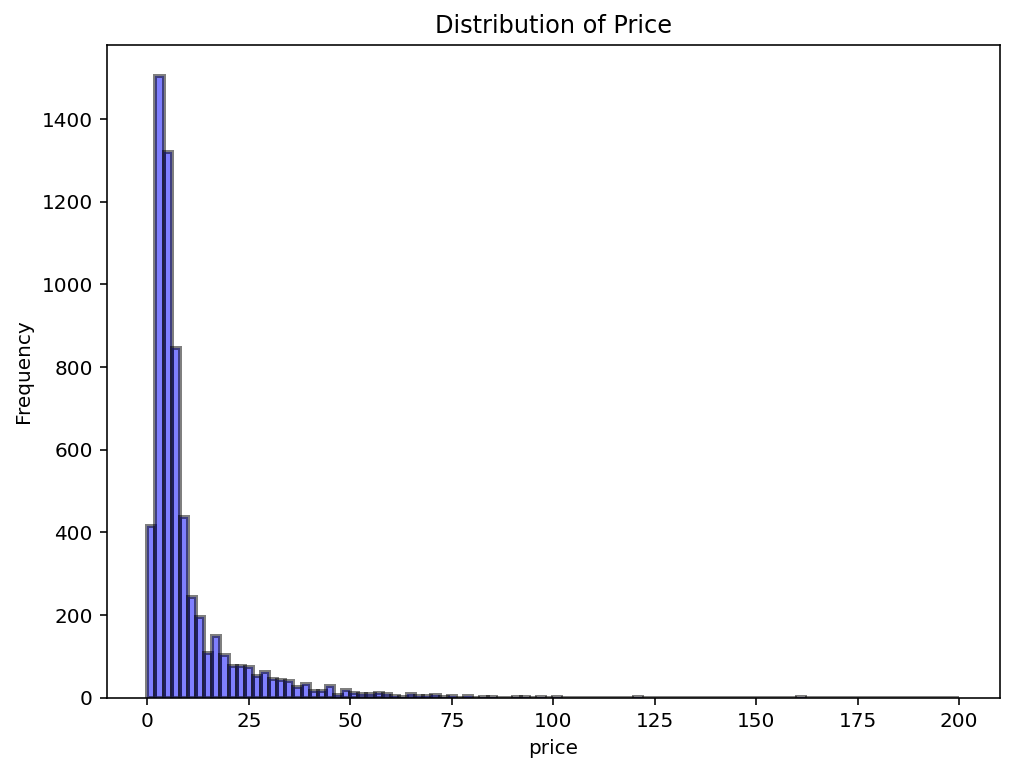

In [7]:
# price 분포: Skewed
# Log scale 조정 필요함!

train.price.plot.hist(color='blue',figsize=(8,6),bins=100,range=(0,200),alpha=0.5,edgecolor='k',linewidth=2)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

Text(0.5, 0, 'log_price')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribuion of Log Price')

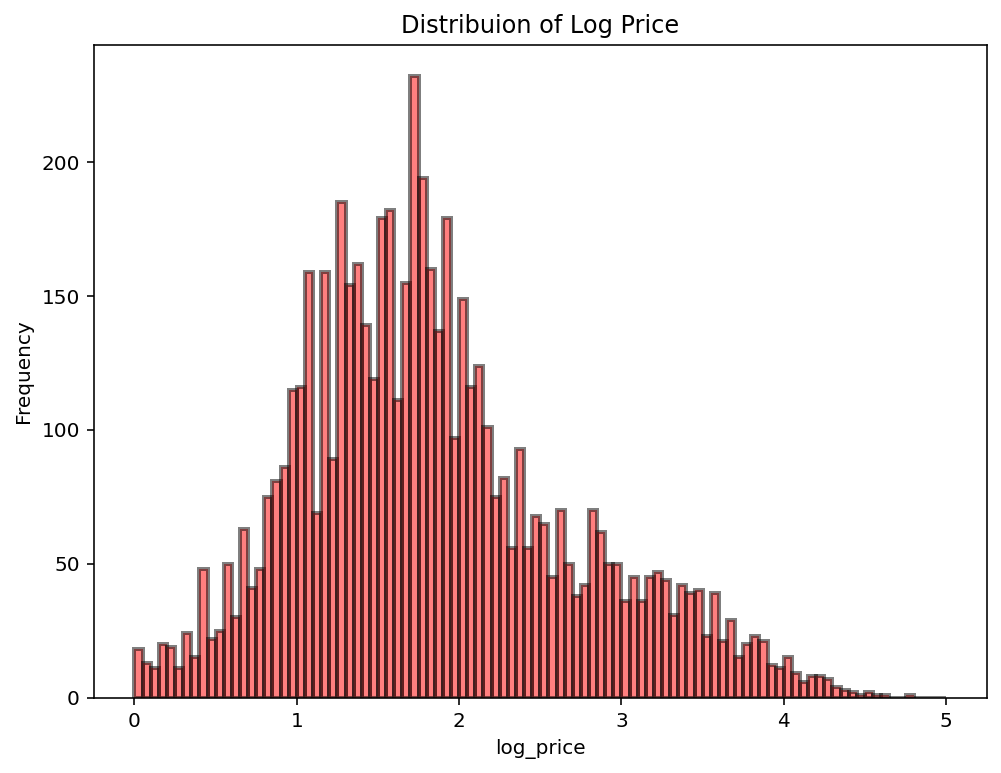

In [8]:
log_price = np.log(train.price)
log_price.plot.hist(color='red',figsize=(8,6),bins=100,range=(0,5),alpha=0.5,edgecolor='k',linewidth=2)
plt.xlabel('log_price')
plt.ylabel('Frequency')
plt.title('Distribuion of Log Price')

#### 텍스트 변수 변형( Name: 차량 브랜드 / 이름)

In [9]:
# Name 변수 -> brand / car_name 생성

split = train.loc[:,'name'].str.split(expand=True)
split

,0,1,2,3,4,5,6,7,8,9
0,Maruti,Wagon,R,LXI,CNG,None,None,None,None,None
1,Hyundai,Creta,1.6,CRDi,SX,Option,None,None,None,None
2,Honda,Jazz,V,None,None,None,None,None,None,None
3,Maruti,Ertiga,VDI,None,None,None,None,None,None,None
4,Audi,A4,New,2.0,TDI,Multitronic,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Swift,VDI,None,None,None,None,None,None,None
6015,Hyundai,Xcent,1.1,CRDi,S,None,None,None,None,None
6016,Mahindra,Xylo,D4,BSIV,None,None,None,None,None,None
6017,Maruti,Wagon,R,VXI,None,None,None,None,None,None


In [10]:
# brand_name 칼럼 추가
train['brand_name'] = split[0]

# brand_name 정리
# car_name은 데이터 전처리가 복잡해 유지

# brand name이 두 글자 이상인 경우
train.loc[train['brand_name'] == 'Land','brand_name'] = 'Land Rover'
train.loc[train['brand_name'] == 'Force','brand_name'] = 'Force One'
train.loc[train['brand_name'] == 'ISUZU', 'brand_name'] = 'Isuzu'
train.loc[train['brand_name'] == 'Smart','brand_name'] = 'Smart Fortwo'

In [11]:
# car_name 생성
name_df = train['name'].str.split(' ')
name_split = name_df.apply(lambda x:pd.Series(x))
two_brands = ['Land','Force','Smart']
train['car_name'] = name_split[0]
# 브랜가 두 글자인 경우 3번째 항목으로 car name 설정
for i in range(len(train['car_name'])):
  if train.loc[i,'car_name'] not in two_brands:
    train.loc[i,'car_name'] = name_split.iloc[i,1]
  else:
    train.loc[i,'car_name'] = name_split.iloc[i,2]
train.head()

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,brand_name,car_name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,A4


Text(0.5, 1.0, 'Count of Unique Values in Brand name')

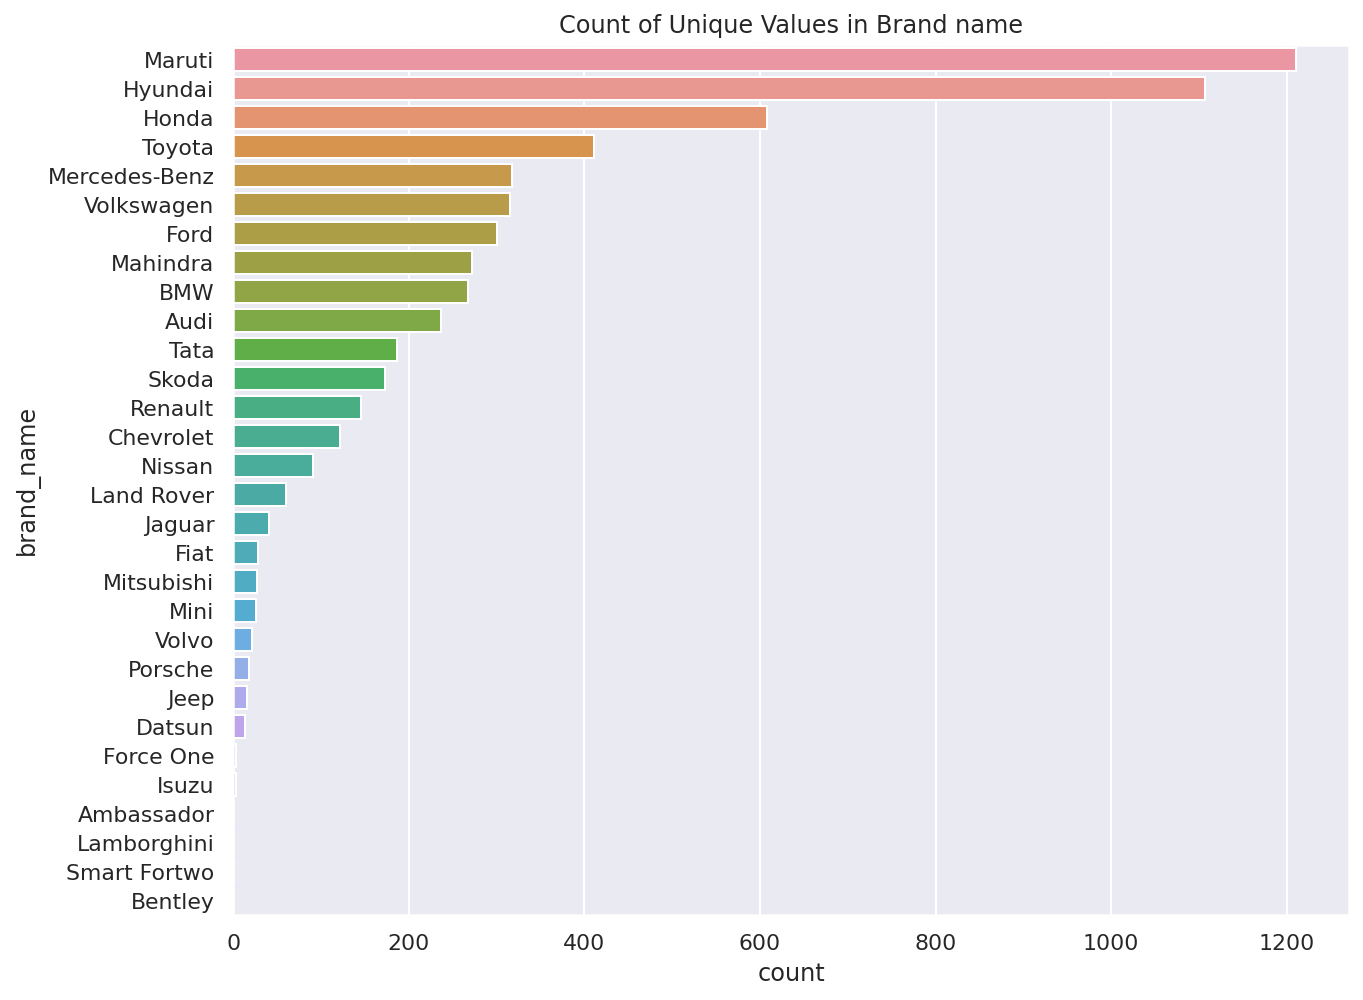

In [12]:
# brand 변수 분포 확인

sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(y='brand_name',data=train, order=train['brand_name'].value_counts().index)
plt.title('Count of Unique Values in Brand name')

#### 연속형 변수 전처리

* year, kilometer_driven, seats, price, milage, engine, power, new_price

##### year 변수, 2020년 기준 역순 정렬

Text(0.5, 0, 'year')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of year')

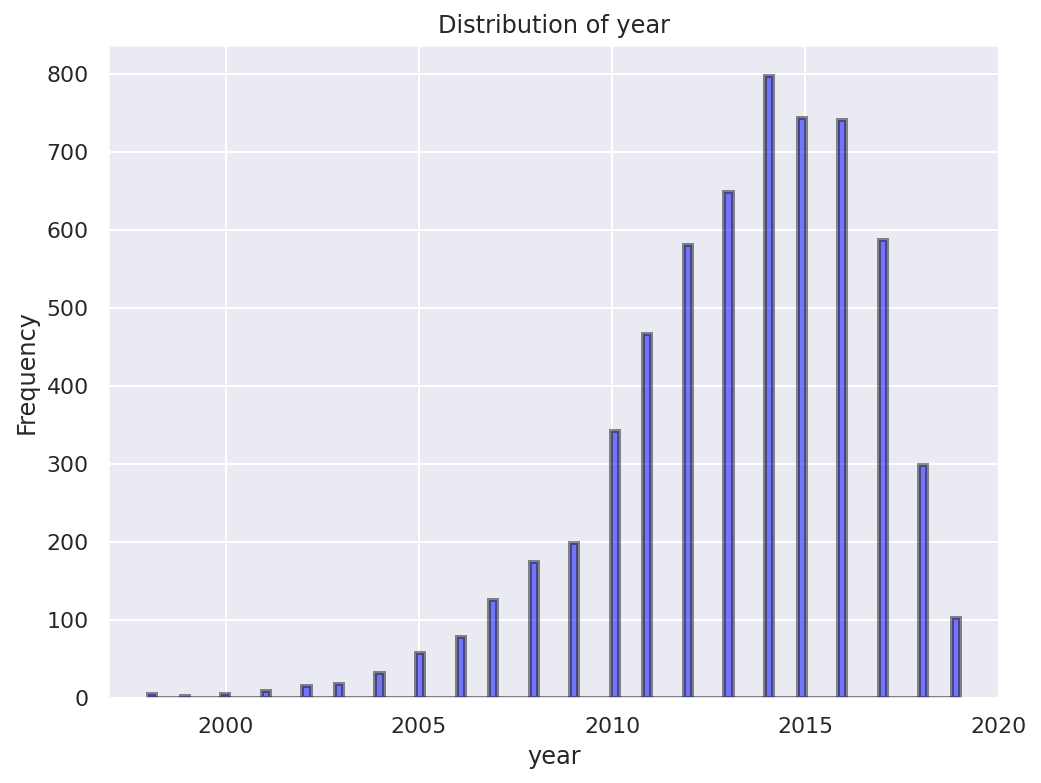

In [13]:
# year 분포 확인
train.year.plot.hist(color='blue',figsize=(8,6),bins=100,alpha=0.5,edgecolor='k',linewidth=2)
plt.xlabel('year')
plt.ylabel('Frequency')
plt.title('Distribution of year')

In [14]:
# year 처리
import datetime
now = datetime.datetime.now()

# 현재 날짜 기준으로 정수 계산
train['year'] = train['year'].apply(lambda x: now.year-x)
train.head()

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,brand_name,car_name
0,Maruti Wagon R LXI CNG,Mumbai,10,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,5,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,9,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,8,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,7,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,A4


Text(0.5, 0, 'year')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of year')

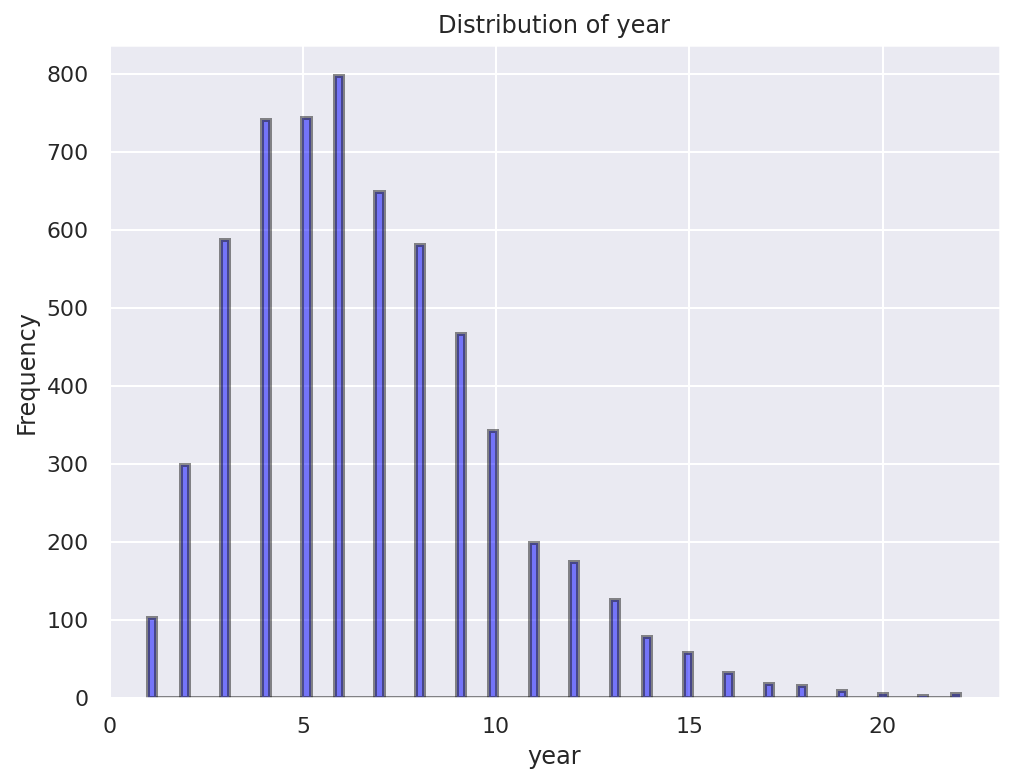

In [15]:
# 수정된 year 분포 확인
train.year.plot.hist(color='blue',figsize=(8,6),bins=100,alpha=0.5,edgecolor='k',linewidth=2)
plt.xlabel('year')
plt.ylabel('Frequency')
plt.title('Distribution of year')

##### kilometer_driven 변수 이상치 제거, 분포 확인

{'boxes': [<matplotlib.lines.Line2D at 0x7f57d5b52c88>],
 'caps': [<matplotlib.lines.Line2D at 0x7f57d57fa748>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f57d57f12b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f57d57faeb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f57d5b52fd0>,
  <matplotlib.lines.Line2D at 0x7f57d57fa390>]}

Text(0.5, 1.0, 'km_driven boxplot')

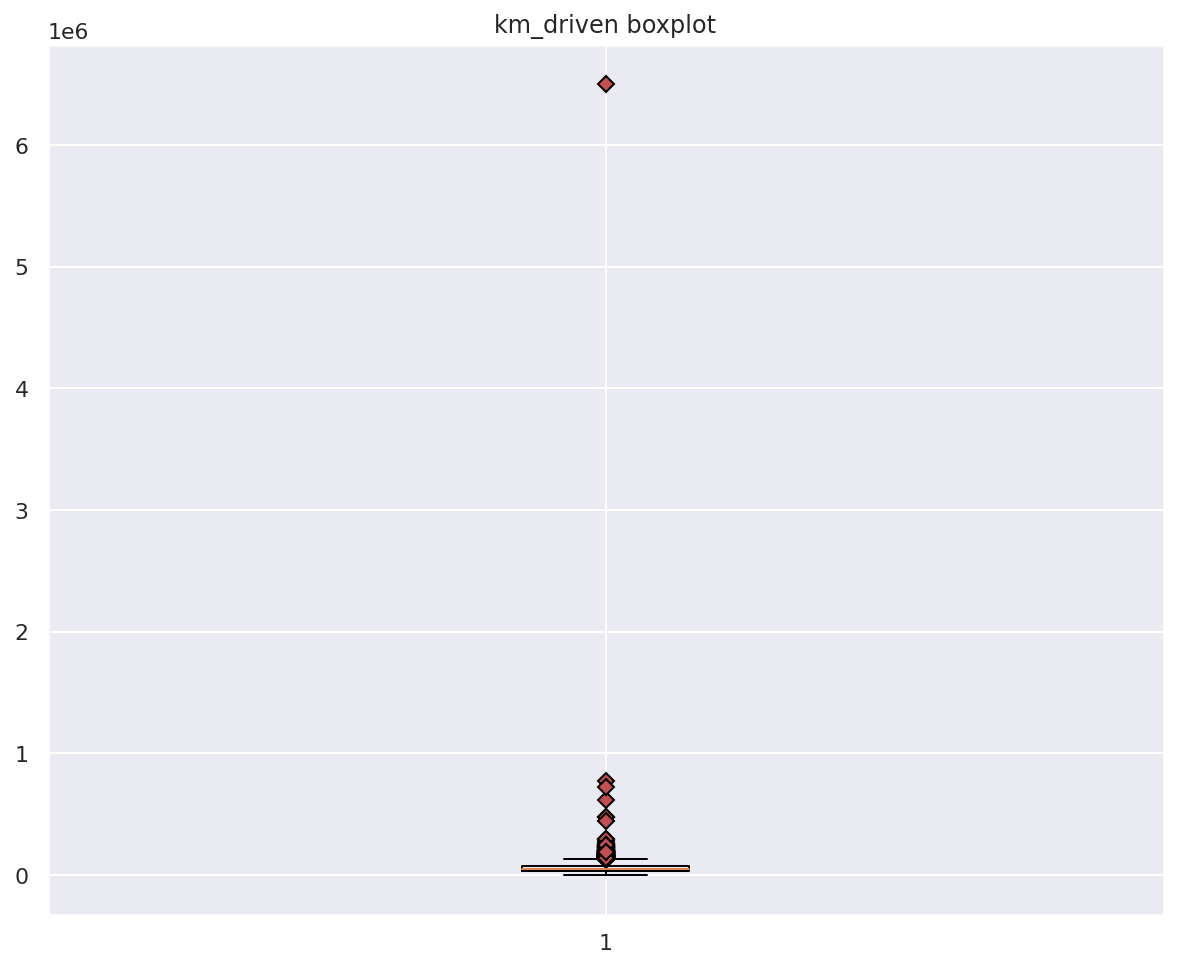

In [16]:
# kilometer_driven 이름 바꾸기
train.rename(columns = {'kilometers_driven':'km_driven'},inplace=True)
# outlier 확인 -> 65000000
red_dia = dict(markerfacecolor='r',marker='D')
plt.boxplot(train['km_driven'],flierprops=red_dia)
plt.title('km_driven boxplot')
plt.show()

In [17]:
# 아웃라이어 확인
train.loc[train.km_driven >= 6e6]

,name,location,year,km_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,brand_name,car_name
2328,BMW X5 xDrive 30d M Sport,Chennai,3,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,65.0,BMW,X5


In [18]:
# 아웃라이어 속성 찾기
# BMW, X5 기종 중 year와 km_driven, seats 를 통해 값 범위 찾기
# year <= 5, seats =5, km_driven <=100000

train.loc[(train.brand_name=='BMW') & (train.name.str.contains('X5')) & (train.year <=4) & (train.km_driven <= 1e6) & (train.seats == 5)]

# 샘플 2311: price 54.45, km_driven: 17,738
# 샘플 4101: price 57.00, km_driven: 45,000
# 샘플 4614: price 70.00, km_driven: 15,000
# 샘플 5740: price 55.00, km_driven: 21,000

# 타겟 2328: price 65.00 // km_driven: 6,500,000 > 65,000

,name,location,year,km_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,brand_name,car_name
2311,BMW X5 xDrive 30d,Coimbatore,4,17738,Diesel,Automatic,First,15.3 kmpl,2993 CC,258 bhp,5.0,NaN,54.45,BMW,X5
4101,BMW X5 xDrive 30d M Sport,Chennai,4,45000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,57.00,BMW,X5
4614,BMW X5 X5 M,Chennai,3,15000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,70.00,BMW,X5
5740,BMW X5 xDrive 30d M Sport,Chennai,3,21000,Diesel,Automatic,Second,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,55.00,BMW,X5


In [19]:
# km_driven 조정
train.loc[train['km_driven'] == 6500000,'km_driven'] = 65000

Text(0.5, 0, 'kilometers')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of kilometers')

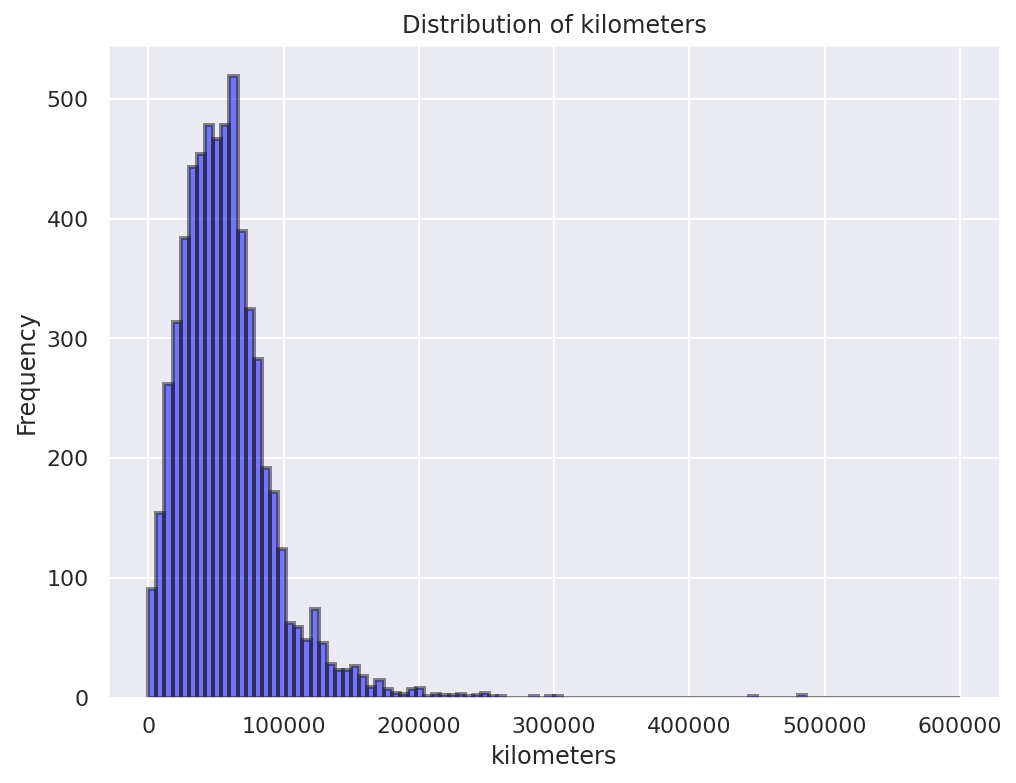

In [20]:
# km_driven 분포 확인: skewed
# log 조정

train.km_driven.plot.hist(color='blue',figsize=(8,6),bins=100, range=(0,600000),alpha=0.5,edgecolor='k',linewidth=2)
plt.xlabel('kilometers')
plt.ylabel('Frequency')
plt.title('Distribution of kilometers')

##### Engine, Mileage, Power 변수

* 단위 제거
* 데이터 타입 변경
* 결측치 / 이상치 처리

In [21]:
# mileage / engine / power : object -> float
# split, options(expand=True)를 통해 문자로 된 숫자 / 문자를 구분
# pd.to_numeric, options(errors = 'coerce'): 문자 포함된 경우 강제로 'NaN'
## NaN 처리 되지 않은 결측치가 mileage의 경우 0.0 kmpl, power의 경우 null bhp로 표기
## 이 경우 모두 숫자형으로 치환하여 NaN 처리

def trans_type(df,column):
  df[column] = df[column].str.split(expand=True)[0]
  df[column] = pd.to_numeric(df[column],errors='coerce')

trans_type(train,'mileage')
trans_type(train,'engine')
trans_type(train,'power')

In [22]:
# 0.0
print(len(train[train.mileage <=  0.0]), end=" ")
print(len(train[train.engine <= 0.0]), end=" ")
print(len(train[train.power <= 0.00]), end=" ")
# nan
print()
print(len(train[train['mileage'].isnull()]), end=" ")
print(len(train[train['engine'].isnull()]), end=" ")
print(len(train[train['power'].isnull()]), end=" ")

68 0 0 
2 36 143 

In [23]:
# mileage 처리

# 1)
# fuel_type이 Electric인 경우 mileage의 값의 비교가 다른 연료에 비하면 어려움
# Electric 데이터 삭제

train.loc[train['fuel_type'] == 'Electric',:]
train.drop(train.loc[train['fuel_type'] == 'Electric',:].index,axis=0,inplace=True)

# 2)
# null 값은 같은 브랜드-차종의 평균 값으로 대체
# 0.0인 값도 null로 대체

null_mileage_car_name = train.loc[train['mileage']==0.0,'car_name'].unique()

dic_mileage = {}
for name in null_mileage_car_name:
  dic_mileage[name] = round(train.loc[train['car_name'] == name, 'mileage'].mean(),2)

for i in train.loc[train['mileage'] == 0.0,'car_name'].unique():
  train.loc[(train['mileage']==0.0) & (train['car_name'] == i),'mileage'] = dic_mileage[i]

# 3)
# 다른 차종이 없어 마일리지의 0 값이 평균으로 대체되지 않은 경우
# 브랜드 평균 값으로 대체

null_mileage_car_name = train.loc[train['mileage']==0.0,'brand_name'].unique()

dic_mileage = {}
for name in null_mileage_car_name:
  dic_mileage[name] = round(train.loc[train['brand_name'] == name, 'mileage'].mean(),2)

for i in train.loc[train['mileage'] == 0.0,'brand_name'].unique():
  train.loc[(train['mileage']==0.0) & (train['brand_name'] == i),'mileage'] = dic_mileage[i]

# 4) car_name과 brand_name으로도 처리되지 않은 값은 전체 평균으로 대체
# car_name과 brand_name 

train.loc[train['mileage'] == 0.0,'mileage'] = train['mileage'].mean()

,name,location,year,km_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,brand_name,car_name
4446,Mahindra E Verito D4,Chennai,4,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58 Lakh,13.00,Mahindra,E
4904,Toyota Prius 2009-2016 Z4,Mumbai,9,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,Toyota,Prius


In [24]:
# engine 결측치 처리

# car_name의 평균 enigine으로 대체

null_engine_car_name = train.loc[train['engine'].isnull(),'car_name'].unique()

dic_engine = {}
for name in null_engine_car_name:
  dic_engine[name] = round(train.loc[train['car_name'] == name,'engine'].mean(),2)

for i in train.loc[train['engine'].isnull(),'car_name'].unique():
  train.loc[(train['engine'].isnull()) & (train['car_name']==i),'engine'] = dic_engine[i]

In [25]:
# power 결측치 처리

# 1)
# null 값은 같은 브랜드-차종의 평균 값으로 대체
# 0.0인 값도 null로 대체

null_power_car_name = train.loc[train['power'].isnull(),'car_name'].unique()

dic_power = {}
for name in null_power_car_name:
  dic_power[name] = round(train.loc[train['car_name'] == name, 'power'].mean(),2)

for i in train.loc[train['power'].isnull(),'car_name'].unique():
  train.loc[(train['power'].isnull()) & (train['car_name'] == i),'power'] = dic_power[i]

# 3)
# 다른 차종이 없어 마일리지의 0 값이 평균으로 대체되지 않은 경우
# 브랜드 평균 값으로 대체

null_power_car_name = train.loc[train['power'].isnull(),'brand_name'].unique()

dic_power = {}
for name in null_power_car_name:
  dic_power[name] = round(train.loc[train['brand_name'] == name, 'power'].mean(),2)

for i in train.loc[train['power'] == 0.0,'brand_name'].unique():
  train.loc[(train['power'].isnull()) & (train['brand_name'] == i),'power'] = dic_power[i]

# 4) car_name과 brand_name으로도 처리되지 않은 값은 전체 평균으로 대체
# car_name과 brand_name 

train.loc[train['power'].isnull(),'power'] = train['power'].mean()

In [26]:
# 0.0
print(len(train[train.mileage <=  0.0]), end=" ")
print(len(train[train.engine <= 0.0]), end=" ")
print(len(train[train.power <= 0.00]), end=" ")
# nan
print()
print(len(train[train['mileage'].isnull()]), end=" ")
print(len(train[train['engine'].isnull()]), end=" ")
print(len(train[train['power'].isnull()]), end=" ")

0 0 0 
0 0 0 

##### seats 변수 (결측치, 이상치 처리)

In [27]:
null_seats_car_name = train.loc[train['seats'].isnull(),'car_name'].unique()

dic_seats = {}
for name in null_seats_car_name:
  dic_seats[name] = train[train['car_name'] == name]['seats'].max()

# Estilo = 평균, seats = 5.0으로 처리
del dic_seats['Estilo']
dic_seats['Estilo'] = 5.0 

try :
  for i in train.loc[train['seats'].isnull(),'car_name'].unique():
    train.loc[(train['seats'].isnull()) & (train['car_name'] == i),'seats'] = dic_seats[i]
except KeyError as e:
  pass

In [29]:
train['seats'].value_counts()

5.0     5050
7.0      678
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: seats, dtype: int64

In [30]:
# 이상치 처리
# seats = 0 인 name을 확인해 본 후, 해당 name의 차가 없어, car_name을 참고하여 seats를 넣음.

train.loc[train['seats']==0.0,['name','seats']]
train.loc[train['name'] == 'Audi A4 3.2 FSI Tiptronic Quattro','seats']

train.loc[train['seats']==0.0,['name','seats','car_name']]
train.loc[train['car_name'] == 'A4','seats'].head()

# 5개로 확인
train.loc[train['seats']==0.0,'seats'] = 5.0

,name,seats
3999,Audi A4 3.2 FSI Tiptronic Quattro,0.0


3999    0.0
Name: seats, dtype: float64

,name,seats,car_name
3999,Audi A4 3.2 FSI Tiptronic Quattro,0.0,A4


4      5.0
50     5.0
65     5.0
103    5.0
150    5.0
Name: seats, dtype: float64

##### new_price
* 결측치가 많아 사용하기 곤란
* boolean 변수로 활용

In [31]:
# new_price 처리 
# 1) 값 결측 없는거 ->1 ,  값 결측 있는거 -> 0
train["yn_new_price"] = train['new_price'].notnull().astype(int)

##### price 변수(타겟값): 이상치 처리


{'boxes': [<matplotlib.lines.Line2D at 0x7f57d54bd2e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f57d54b9cf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f57d54b7668>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f57d54b7dd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f57d54bbc18>,
  <matplotlib.lines.Line2D at 0x7f57d54bb4a8>]}

Text(0.5, 1.0, 'price boxplot')

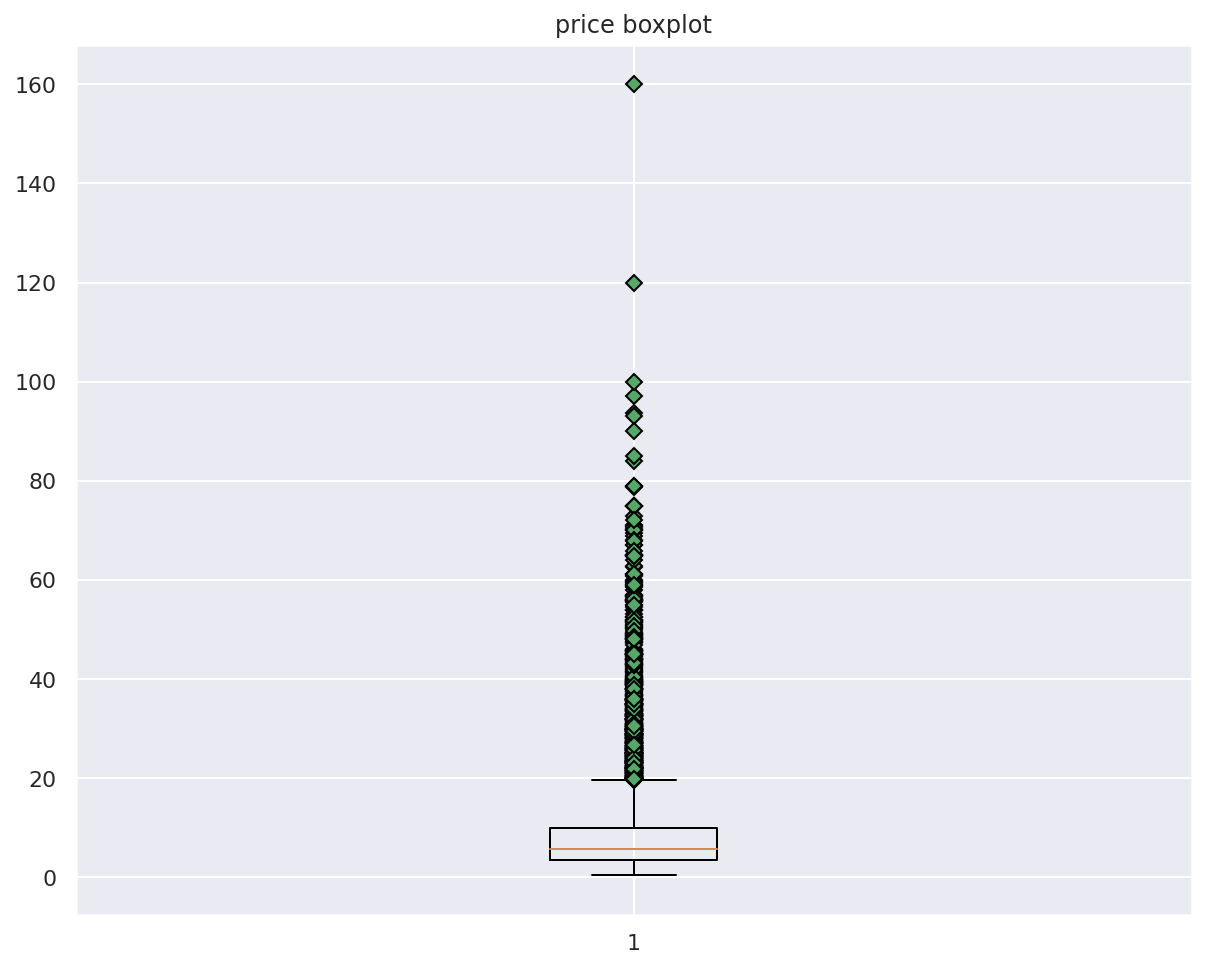

In [32]:
# price 분포 확인
green_dia = dict(markerfacecolor='g',marker='D')
plt.boxplot(train['price'],flierprops=green_dia)
plt.title('price boxplot')

# price가 160인 차종
# LandRover Range Rover 3.0 Diesel LWB Vogue의 price가 잘못 표기된 것으로 보임

train.drop(train.loc[train['price'] == 160.0, :].index, axis=0,inplace=True)

#### 범주형 변수 전처리
* name(brand name / car name)
* location
* fuel_type
* transmission
* ownser_type

##### location / 범주화(3, 인도 지역 특성 반영)

In [33]:
# location 처리

# 인도의 도시 발달 역사를 기준으로
# mubai/deli/col/chenai -> metro 1
# bangalroo/ hyd/ameda/pune -> metro 2
# zaipuru / cochi/ coinbatro -> metro 3 / emergiging

loc_list = train['location'].unique()
loc_map = {'Mumbai':'metro 1','Delhi':'metro 1','Kolkata':'metro 1','Chennai':'metro 1',
           'Bangalore':'metro 2','Hyderabad':'metro 2','Ahmedabad':'metro 2','Pune':'metro 2',
           'Jaipur':'emerging','Kochi':'emerging','Coimbatore':'emerging'}
train['loc_type'] = train['location'].map(loc_map)
train

,name,location,year,km_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,brand_name,car_name,yn_new_price,loc_type
0,Maruti Wagon R LXI CNG,Mumbai,10,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon,0,metro 1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,5,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta,0,metro 2
2,Honda Jazz V,Chennai,9,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz,1,metro 1
3,Maruti Ertiga VDI,Chennai,8,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga,0,metro 1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,7,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4,0,emerging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,6,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75,Maruti,Swift,1,metro 1
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,5,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00,Hyundai,Xcent,0,emerging
6016,Mahindra Xylo D4 BSIV,Jaipur,8,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90,Mahindra,Xylo,0,emerging
6017,Maruti Wagon R VXI,Kolkata,7,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65,Maruti,Wagon,0,metro 1


Text(0.5, 1.0, 'Count of Unique Values in location')

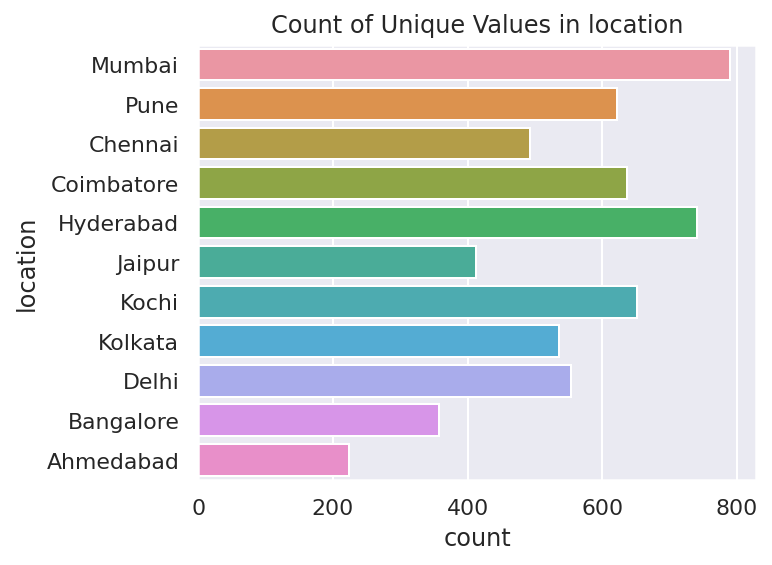

In [34]:
sns.set(rc={'figure.figsize':(5,4)})
sns.countplot(y='location',data=train)
plt.title('Count of Unique Values in location')

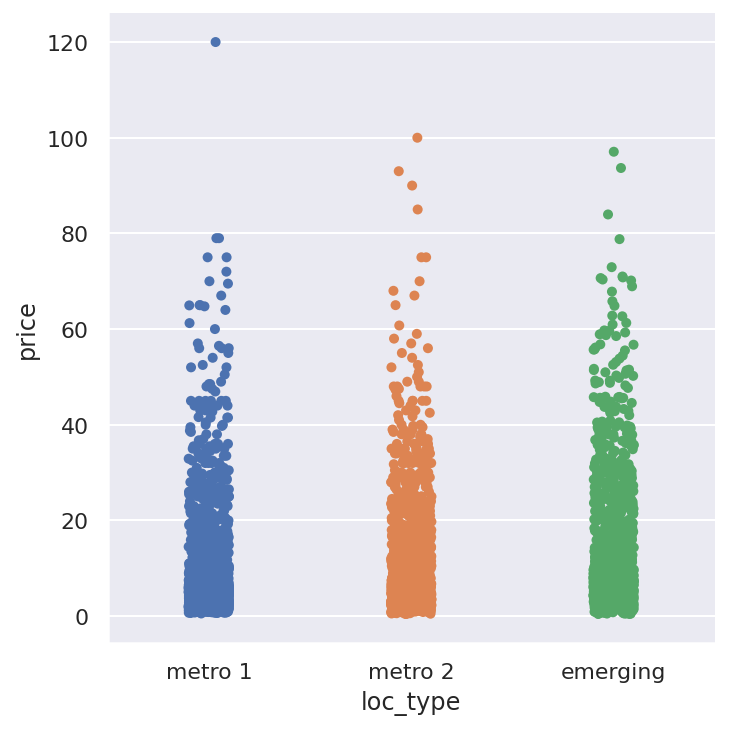

In [35]:
sns.catplot(x='loc_type',y='price',data=train)

##### fuel_type 범주화(5 > 3)

In [36]:
# fuel_type 처리

train.loc[(train['fuel_type']=='CNG') | (train['fuel_type']=='LPG'),'fuel_type'] = 'Gas'
train.fuel_type.value_counts()

Diesel    3204
Petrol    2746
Gas         66
Name: fuel_type, dtype: int64

Text(0.5, 1.0, 'Count of Unique Values in Fuel Type')

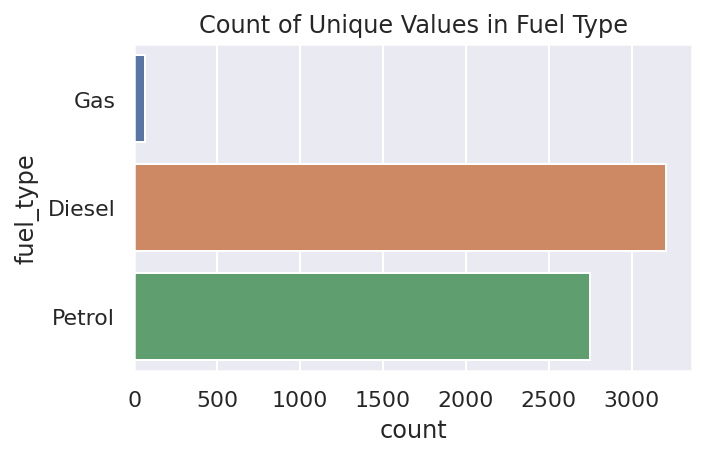

In [37]:
sns.set(rc={'figure.figsize':(5,3)})
sns.countplot(y='fuel_type',data=train)
plt.title('Count of Unique Values in Fuel Type')

##### owner_type 범주화

In [38]:
# owner list 
owner_list = train['owner_type']

# third + Fourth & Above  묶기
train.loc[train['owner_type'] == 'Fourth & Above','owner_type'] = 'Third'
train['owner_type'].value_counts()

First     4926
Second     968
Third      122
Name: owner_type, dtype: int64

Text(0.5, 1.0, 'Count of Unique Values in Owner Type')

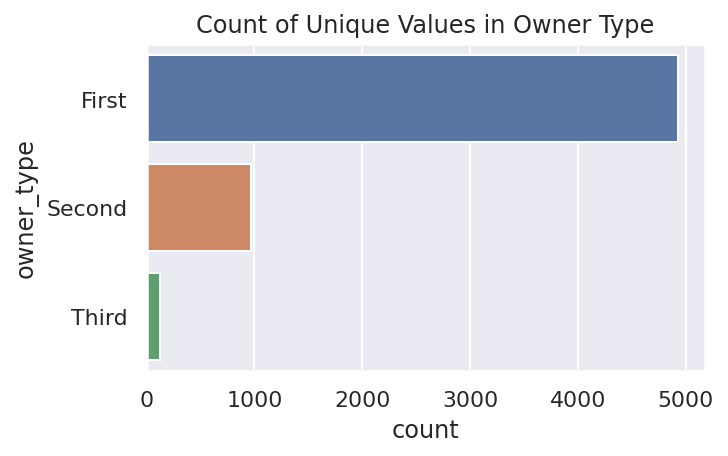

In [39]:
sns.set(rc={'figure.figsize':(5,3)})
sns.countplot(y='owner_type',data=train)
plt.title('Count of Unique Values in Owner Type')

##### transmission

In [40]:
train['transmission'].value_counts()

Manual       4299
Automatic    1717
Name: transmission, dtype: int64

Text(0.5, 1.0, 'Count of Unique Values in Transmission')

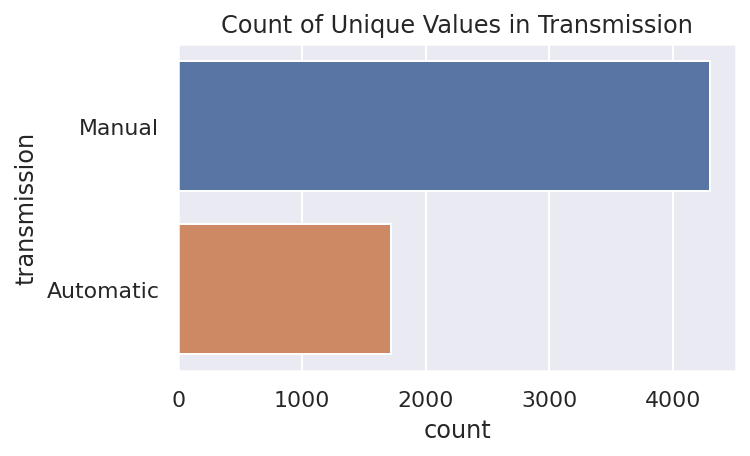

In [41]:
sns.set(rc={'figure.figsize':(5,3)})
sns.countplot(y='transmission',data=train)
plt.title('Count of Unique Values in Transmission')

##### brand_name 중 샘플이 적은 브랜드: sparsebrand로 묶기

In [42]:
# brand_name 처리 

# 전체 개수 및 비율 비교
df_brand_name = pd.DataFrame(train.brand_name.value_counts())
df_brand_name.rename(columns={'brand_name':'count'},inplace=True)
total = sum(df_brand_name['count'])
df_brand_name['ratio'] = df_brand_name['count'].apply(lambda x : (x /total ) *100)

# 1) 전체 개수 중 10개 이하인건 기타로 묶기 
sparse_brand_lst= df_brand_name.loc[df_brand_name['count']<10,:].index.values.tolist()
train.loc[train["brand_name"].isin(sparse_brand_lst),"brand_name"] = "sparse_brand"

df_brand_name.loc[df_brand_name['count']<10,:]

# 2) 전체 2% 이하인건 기타로 묶기 
# df_brand_name.loc[df_brand_name['ratio']<1,:]

,count,ratio
Force One,3,0.049867
Isuzu,3,0.049867
Ambassador,1,0.016622
Lamborghini,1,0.016622
Smart Fortwo,1,0.016622
Bentley,1,0.016622


In [43]:
sparse_brand_lst

['Force One', 'Isuzu', 'Ambassador', 'Lamborghini', 'Smart Fortwo', 'Bentley']

#### 훈련 데이터 / label분리하기

In [44]:
train.columns

Index(['name', 'location', 'year', 'km_driven', 'fuel_type', 'transmission',
       'owner_type', 'mileage', 'engine', 'power', 'seats', 'new_price',
       'price', 'brand_name', 'car_name', 'yn_new_price', 'loc_type'],
      dtype='object')

In [45]:
x_df = train[['year', 'km_driven', 'fuel_type', 'transmission', 'owner_type','mileage', 'engine', 'power', 'seats', 'price', 'brand_name','yn_new_price', 'loc_type']].copy()
x = x_df.drop("price", axis=1)
y_labels = x_df["price"].copy()
y_log = np.log(y_labels) + 1

In [46]:
x.shape,y_log.shape

((6016, 12), (6016,))

#### PCA(Engine, Power, Mileage)

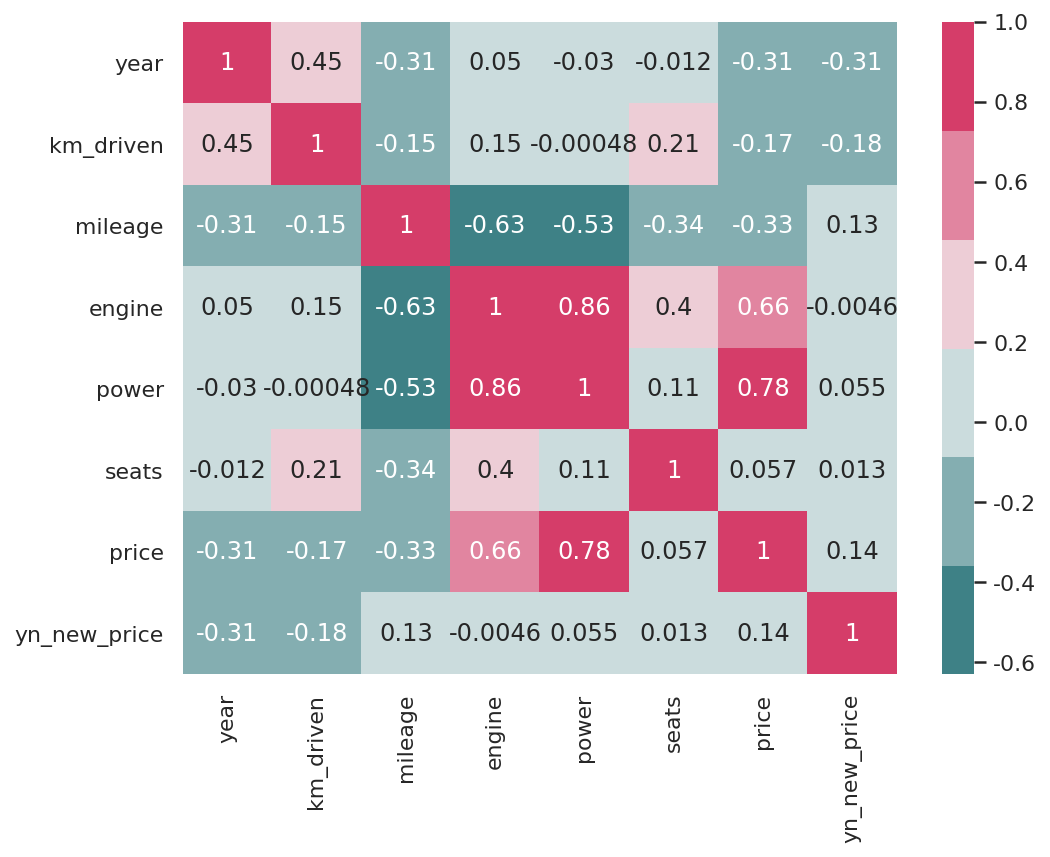

In [47]:
# Engine을 중심으로 Mileage와의 상관계수 절대값은 0.63, Power와의 상관계수 절대값은 0.87

sns.set(rc={'figure.figsize':(8,6)})
cmap = sns.diverging_palette(200, 0)
corr_heatmap = sns.heatmap(x_df.corr(),cmap=cmap, annot=True)
corr_heatmap

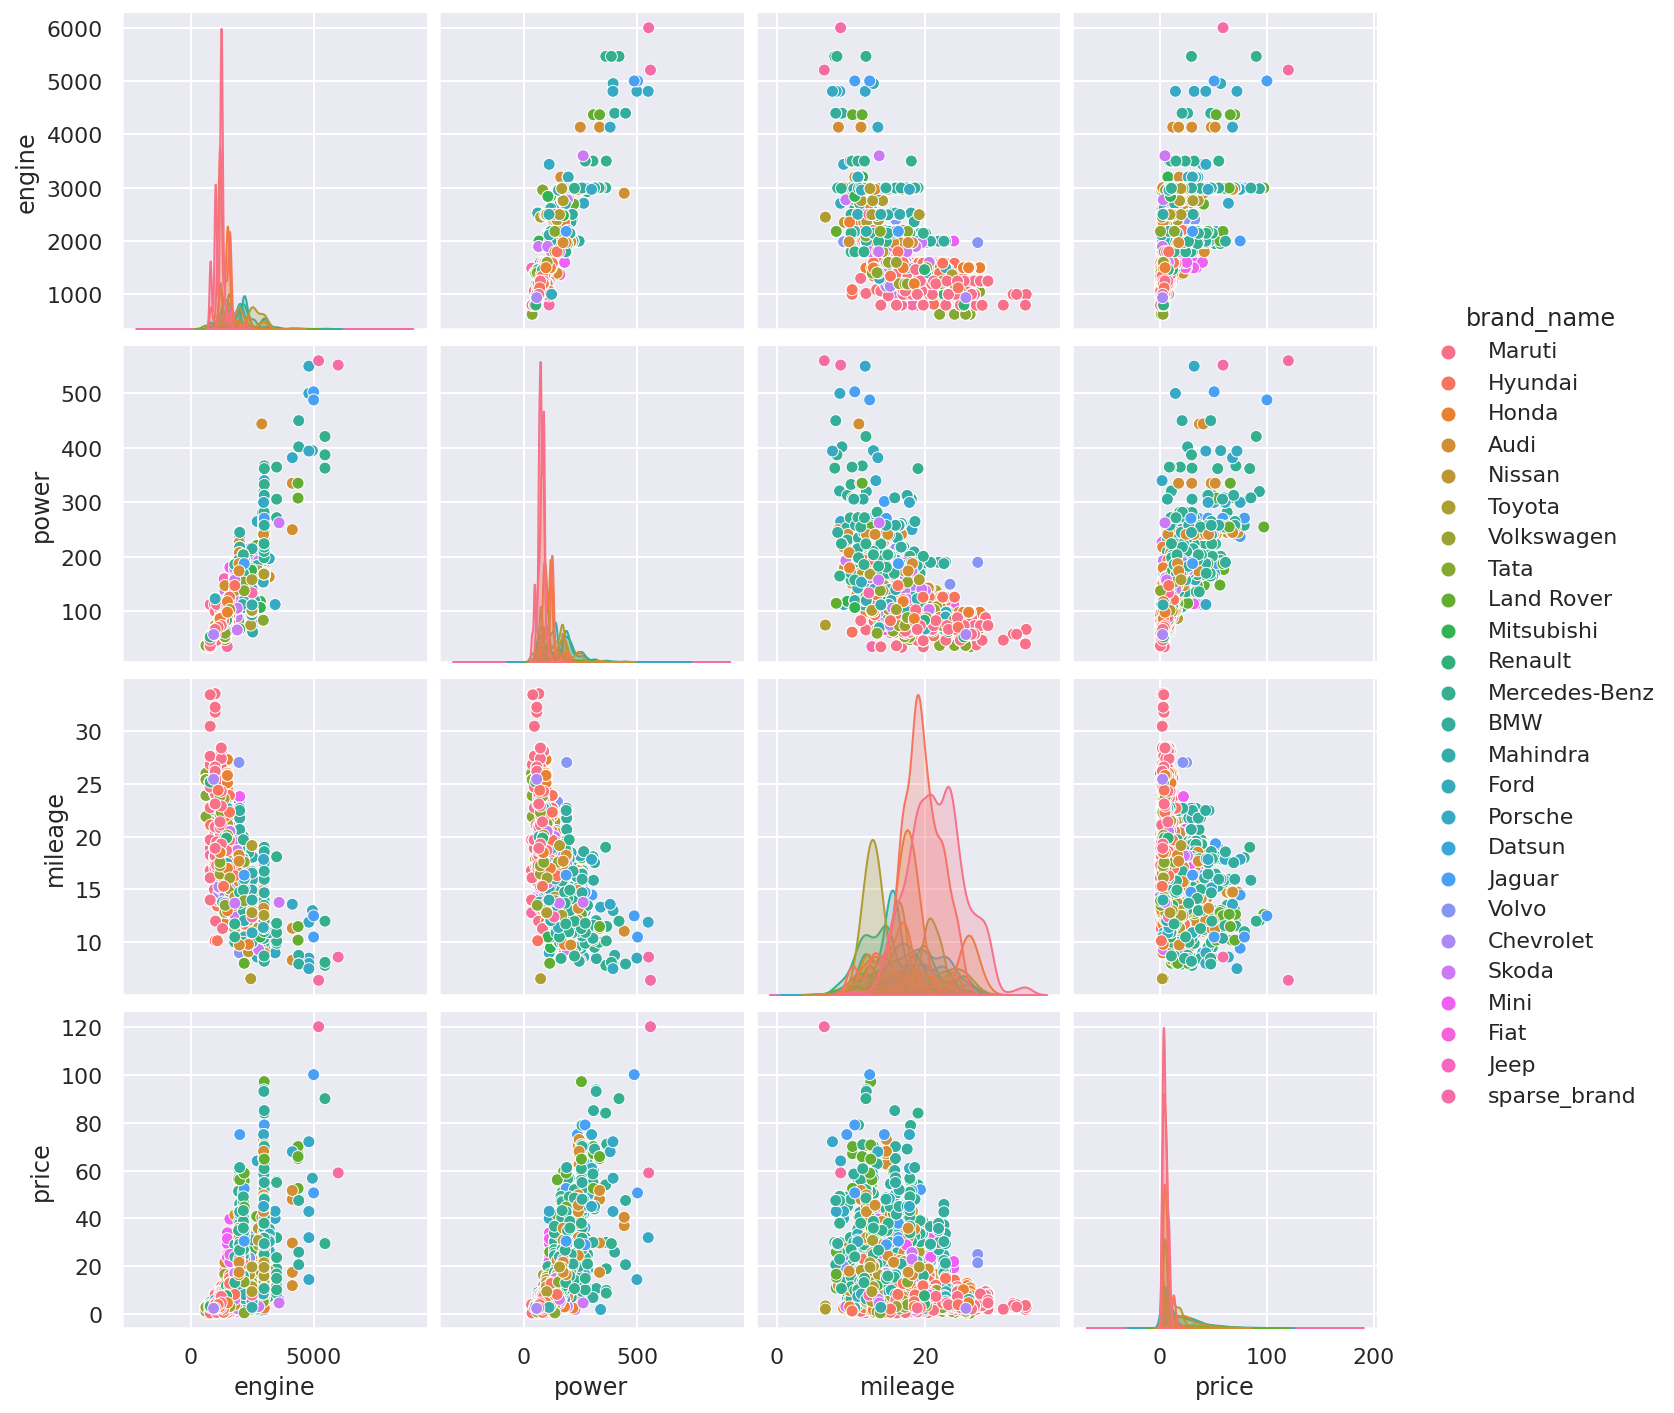

In [48]:
# engine과 power의 산포도는 일직선에 가까운 모양을 형성, 선형모델을 로그 필요한 변수들 존재

sns.pairplot(x_df, vars=['engine', 'power','mileage','price'], hue='brand_name')

In [133]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
train_for_pca = np.log(x_df[['engine', 'power']])
pca.fit(train_for_pca)
print()
print('singular value :', pca.singular_values_)
print('singular vector :\n', pca.components_.T)
print('공분산의 설명량',pca.explained_variance_ratio_)
print("PC1 정보량 : ",pca.explained_variance_ratio_[0])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


singular value : [40.42781293  9.70445711]
singular vector :
 [[ 0.62021129  0.7844348 ]
 [ 0.7844348  -0.62021129]]
공분산의 설명량 [0.94551815 0.05448185]
PC1 정보량 :  0.9455181477260547


## 2가지 DataFrame
* LOG와 PCA
* 일반 전처리

### Pipeline1, LOG+PCA

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA

class Custom_Log(BaseEstimator,TransformerMixin) :
  def __init__(self,centering=False) :
    self.centering = centering

  def fit(self,X,y=None):
    return self 
    
  def transform(self,X):
    log_tmp = np.log(X)
    if self.centering:
      centering_log_tmp = log_tmp - log_tmp.mean(axis=0)
      return centering_log_tmp
    else : 
      return log_tmp
  
class Custom_pass(BaseEstimator,TransformerMixin) :
  def __init__(self) :
    pass

  def fit(self,X,y=None):
    return self
    
  def transform(self,X):
    return X

In [51]:
# PCA 파이프라인
pca_num_pipeline = Pipeline([
                             ('Log', Custom_Log(centering=True)),
                             ('PCA', PCA(n_components=1)),
])

# 연속형 변수 파이프라인
num_pipeline = Pipeline([
                         ('Log', Custom_Log(centering=False)),
])

# 전처리 하지 않을 변수 파이프라인
raw_num_pipeline = Pipeline([
    ('raw_data_pass', Custom_pass())
])

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# pca 변수 배열
pca_num_attribs = ['engine', 'power']
# 연속형 변수 배열
else_num_attribs = ['mileage','km_driven']
# 전처리 하지 않을 변수
raw_num_attribs = ["year"]
# 범주형 타입 변수
cat_attribs = ['fuel_type',"transmission","owner_type",'seats','brand_name','yn_new_price','loc_type']

full_pipeline = ColumnTransformer([
                                   ("pca_num", pca_num_pipeline, pca_num_attribs), # 로그 -> centering -> PCA 
                                   ("else_num", num_pipeline, else_num_attribs), # 로그만
                                   ("orgin_num", raw_num_pipeline, raw_num_attribs), # 그대로
                                   ("cat", OneHotEncoder(sparse=False), cat_attribs),
])

x_prepared = full_pipeline.fit_transform(x)

In [53]:
x_prepared.shape

(6016, 50)

In [54]:
x_prepared[:1,]

array([[-0.71019684,  3.28091122, 11.1844214 , 10.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ]])

In [55]:
y_log.shape

(6016,)

In [56]:
y_log[:1]

0    1.559616
Name: price, dtype: float64

#### Variable Selection

In [57]:
# one hot encoding 변수 리스트
cat_one_hot_attribs = full_pipeline.named_transformers_["cat"].get_feature_names(cat_attribs).tolist()

# 연속형 설명 변수 추가하기
attributes = ["PC1"] + else_num_attribs + raw_num_attribs + cat_one_hot_attribs
attributes

# x_prepared의 칼럼 명 변환 
x_df = pd.DataFrame(x_prepared, columns = attributes)

['PCA1',
 'mileage',
 'km_driven',
 'year',
 'fuel_type_Diesel',
 'fuel_type_Gas',
 'fuel_type_Petrol',
 'transmission_Automatic',
 'transmission_Manual',
 'owner_type_First',
 'owner_type_Second',
 'owner_type_Third',
 'seats_2.0',
 'seats_4.0',
 'seats_5.0',
 'seats_6.0',
 'seats_7.0',
 'seats_8.0',
 'seats_9.0',
 'seats_10.0',
 'brand_name_Audi',
 'brand_name_BMW',
 'brand_name_Chevrolet',
 'brand_name_Datsun',
 'brand_name_Fiat',
 'brand_name_Ford',
 'brand_name_Honda',
 'brand_name_Hyundai',
 'brand_name_Jaguar',
 'brand_name_Jeep',
 'brand_name_Land Rover',
 'brand_name_Mahindra',
 'brand_name_Maruti',
 'brand_name_Mercedes-Benz',
 'brand_name_Mini',
 'brand_name_Mitsubishi',
 'brand_name_Nissan',
 'brand_name_Porsche',
 'brand_name_Renault',
 'brand_name_Skoda',
 'brand_name_Tata',
 'brand_name_Toyota',
 'brand_name_Volkswagen',
 'brand_name_Volvo',
 'brand_name_sparse_brand',
 'yn_new_price_0',
 'yn_new_price_1',
 'loc_type_emerging',
 'loc_type_metro 1',
 'loc_type_metro 2']

##### Importance Test

###### RF(variance importance)

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(x_prepared, y_log)
rf_importances = rf.feature_importances_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Feature importances')

<BarContainer object of 20 artists>

([<matplotlib.axis.XTick at 0x7f57cb6764a8>,
 [Text(0, 0, 'PCA1'),
  Text(0, 0, 'year'),
  Text(0, 0, 'km_driven'),
  Text(0, 0, 'mileage'),
  Text(0, 0, 'transmission_Manual'),
  Text(0, 0, 'transmission_Automatic'),
  Text(0, 0, 'loc_type_metro 1'),
  Text(0, 0, 'brand_name_Tata'),
  Text(0, 0, 'brand_name_Honda'),
  Text(0, 0, 'brand_name_Mini'),
  Text(0, 0, 'seats_5.0'),
  Text(0, 0, 'loc_type_metro 2'),
  Text(0, 0, 'brand_name_Toyota'),
  Text(0, 0, 'brand_name_Mahindra'),
  Text(0, 0, 'brand_name_Hyundai'),
  Text(0, 0, 'brand_name_Maruti'),
  Text(0, 0, 'brand_name_Skoda'),
  Text(0, 0, 'brand_name_Chevrolet'),
  Text(0, 0, 'brand_name_Audi'),
  Text(0, 0, 'brand_name_Mercedes-Benz')])

(-1.0, 20.0)

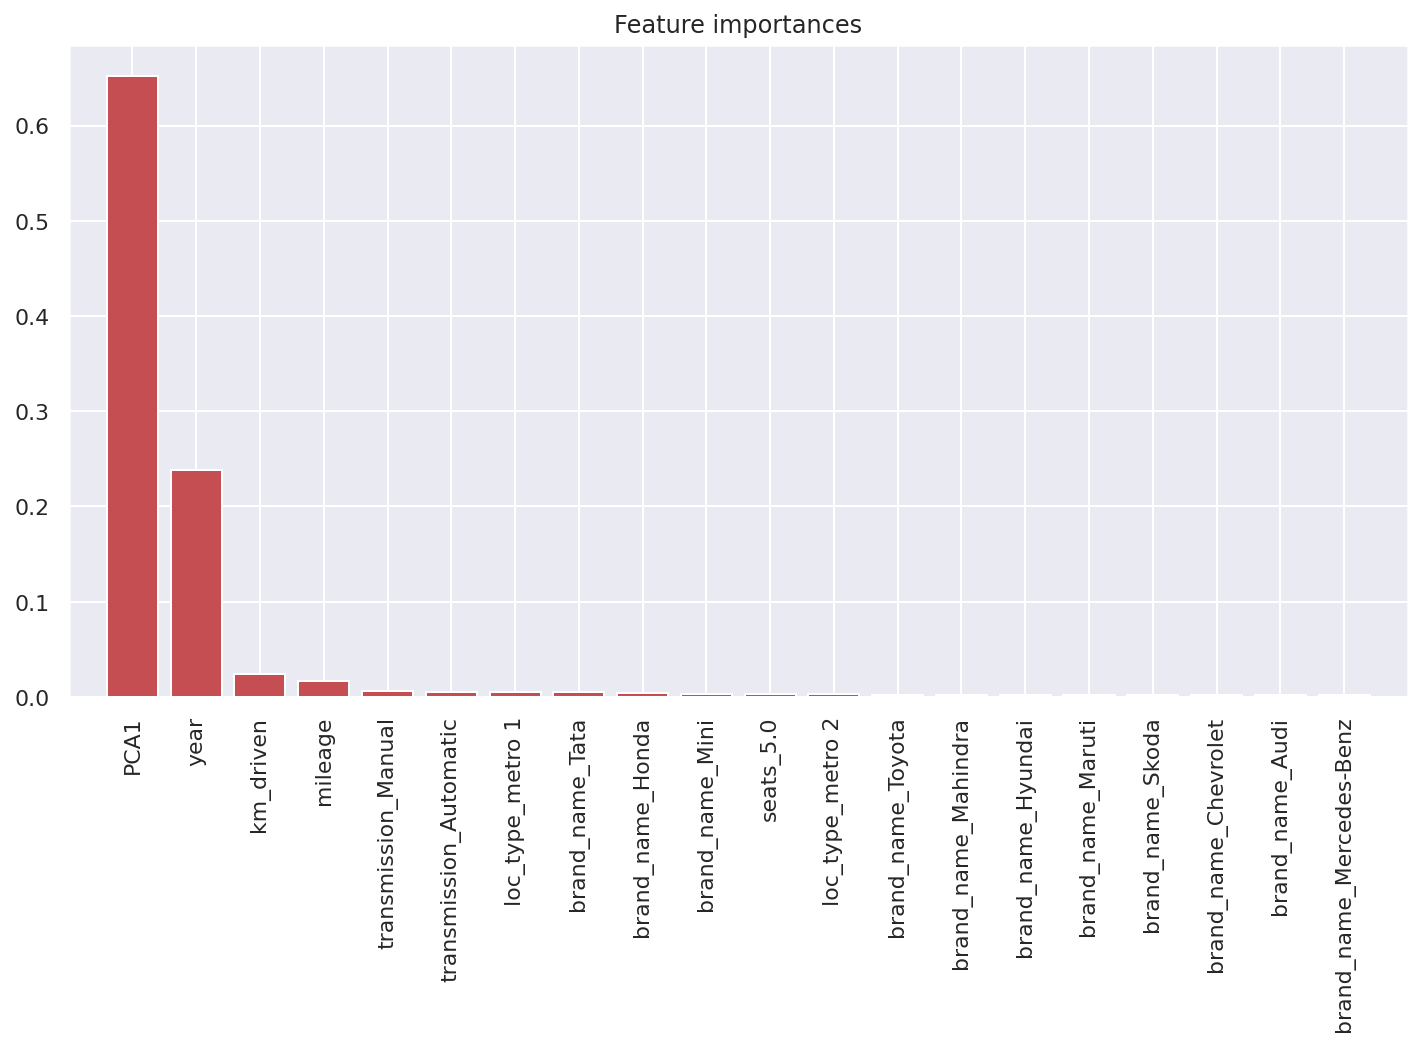

In [59]:
# 중요도 내림차순으로 20개
rf_indices = np.argsort(rf_importances)[::-1][:20]

# 중요도 시각화
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(rf_indices)), rf_importances[rf_indices], color="r", align="center")
plt.xticks(range(len(rf_indices)), np.array(attributes)[rf_indices], rotation='vertical')
plt.xlim([-1, len(rf_indices)])

###### XGBoost

In [60]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror',random_state=42)
xgb_reg.fit(x_prepared,y_log)
xgb_importances = xgb_reg.feature_importances_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

[(0.28334117, 'PCA1'),
 (0.17598365, 'transmission_Automatic'),
 (0.14926948, 'year'),
 (0.060435988, 'brand_name_Honda'),
 (0.04854785, 'fuel_type_Diesel'),
 (0.028002052, 'brand_name_Tata'),
 (0.020388288, 'loc_type_metro 1'),
 (0.019562276, 'brand_name_Mercedes-Benz'),
 (0.01802916, 'brand_name_Chevrolet'),
 (0.017913932, 'brand_name_Land Rover'),
 (0.016091697, 'brand_name_Toyota'),
 (0.013263826, 'seats_4.0'),
 (0.012997978, 'brand_name_Mini'),
 (0.012408022, 'seats_2.0'),
 (0.012372416, 'km_driven'),
 (0.0096650515, 'brand_name_Porsche'),
 (0.008763771, 'loc_type_metro 2'),
 (0.008721768, 'brand_name_Skoda'),
 (0.008696569, 'brand_name_Mahindra'),
 (0.008376373, 'owner_type_First'),
 (0.008050859, 'fuel_type_Petrol'),
 (0.0076293843, 'brand_name_Audi'),
 (0.0065219137, 'brand_name_Maruti'),
 (0.0053705913, 'brand_name_Ford'),
 (0.0048107, 'seats_5.0'),
 (0.0044518486, 'seats_8.0'),
 (0.0041465815, 'brand_name_BMW'),
 (0.003922414, 'owner_type_Third'),
 (0.0038678208, 'mileage'),


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Feature importances')

<BarContainer object of 20 artists>

([<matplotlib.axis.XTick at 0x7f57d0ac2208>,
 [Text(0, 0, 'PCA1'),
  Text(0, 0, 'transmission_Automatic'),
  Text(0, 0, 'year'),
  Text(0, 0, 'brand_name_Honda'),
  Text(0, 0, 'fuel_type_Diesel'),
  Text(0, 0, 'brand_name_Tata'),
  Text(0, 0, 'loc_type_metro 1'),
  Text(0, 0, 'brand_name_Mercedes-Benz'),
  Text(0, 0, 'brand_name_Chevrolet'),
  Text(0, 0, 'brand_name_Land Rover'),
  Text(0, 0, 'brand_name_Toyota'),
  Text(0, 0, 'seats_4.0'),
  Text(0, 0, 'brand_name_Mini'),
  Text(0, 0, 'seats_2.0'),
  Text(0, 0, 'km_driven'),
  Text(0, 0, 'brand_name_Porsche'),
  Text(0, 0, 'loc_type_metro 2'),
  Text(0, 0, 'brand_name_Skoda'),
  Text(0, 0, 'brand_name_Mahindra'),
  Text(0, 0, 'owner_type_First')])

(-1.0, 20.0)

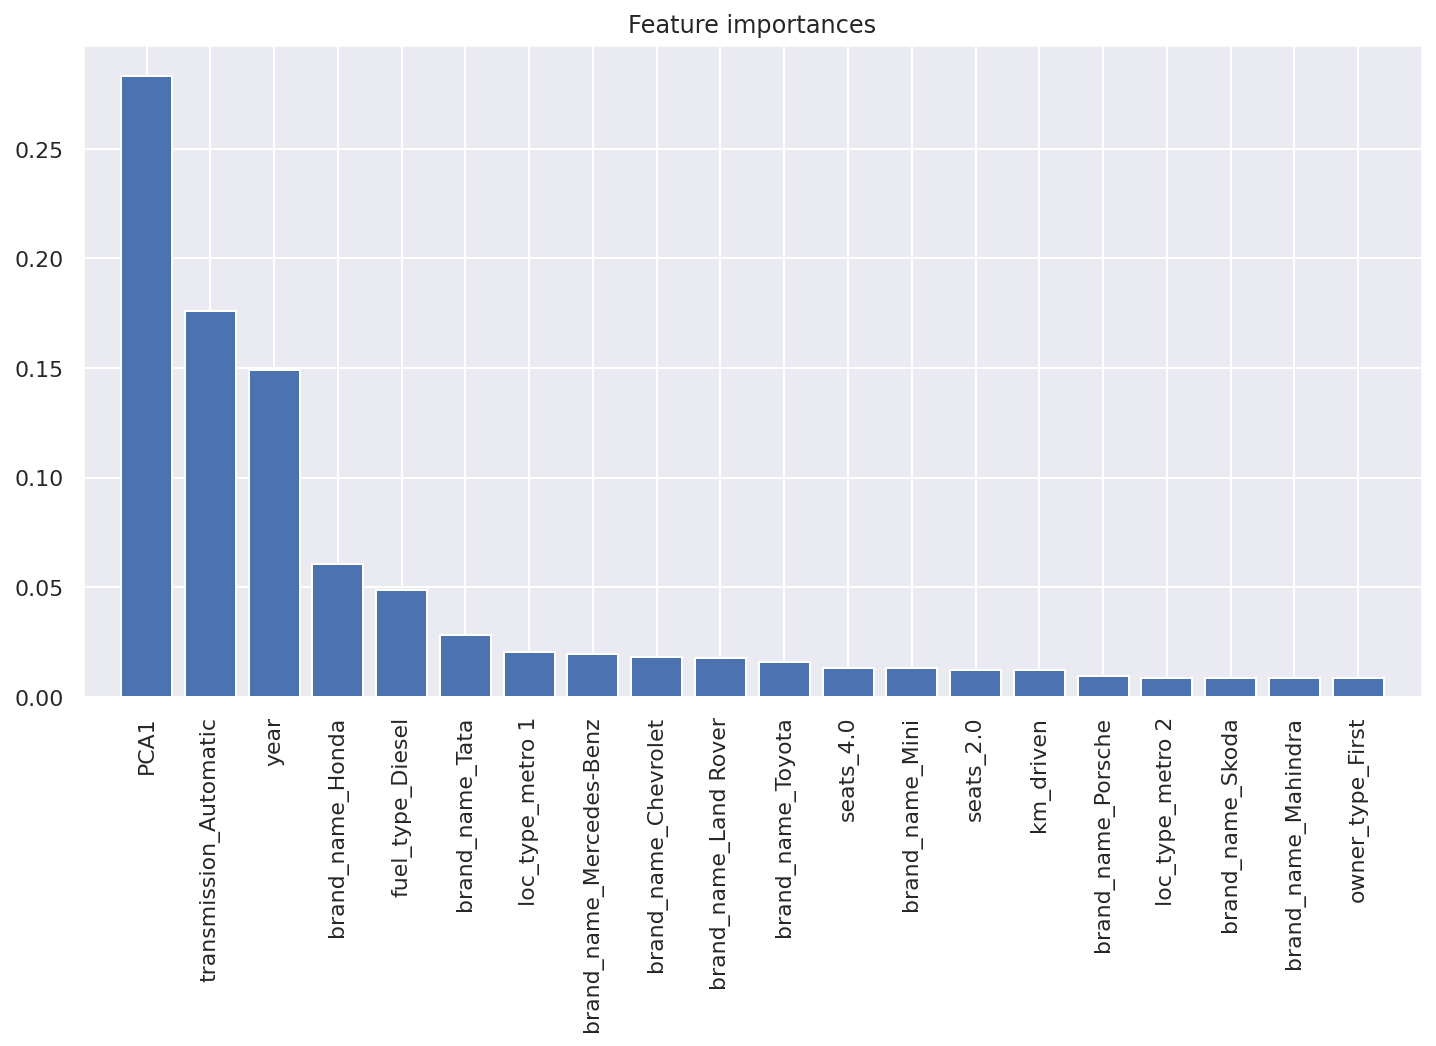

In [61]:
# 중요도 내림차순
sorted( zip(xgb_importances, attributes) , reverse = True)
xgb_indices = np.argsort(xgb_importances)[::-1][:20]

plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(xgb_indices)), xgb_importances[xgb_indices], color="b", align="center")
plt.xticks(range(len(xgb_indices)), np.array(attributes)[xgb_indices], rotation='vertical')
plt.xlim([-1, len(xgb_indices)])
plt.show()

In [62]:
import_df = pd.DataFrame({'xgb':xgb_importances,
                          'rf':rf_importances},
              index=attributes) 

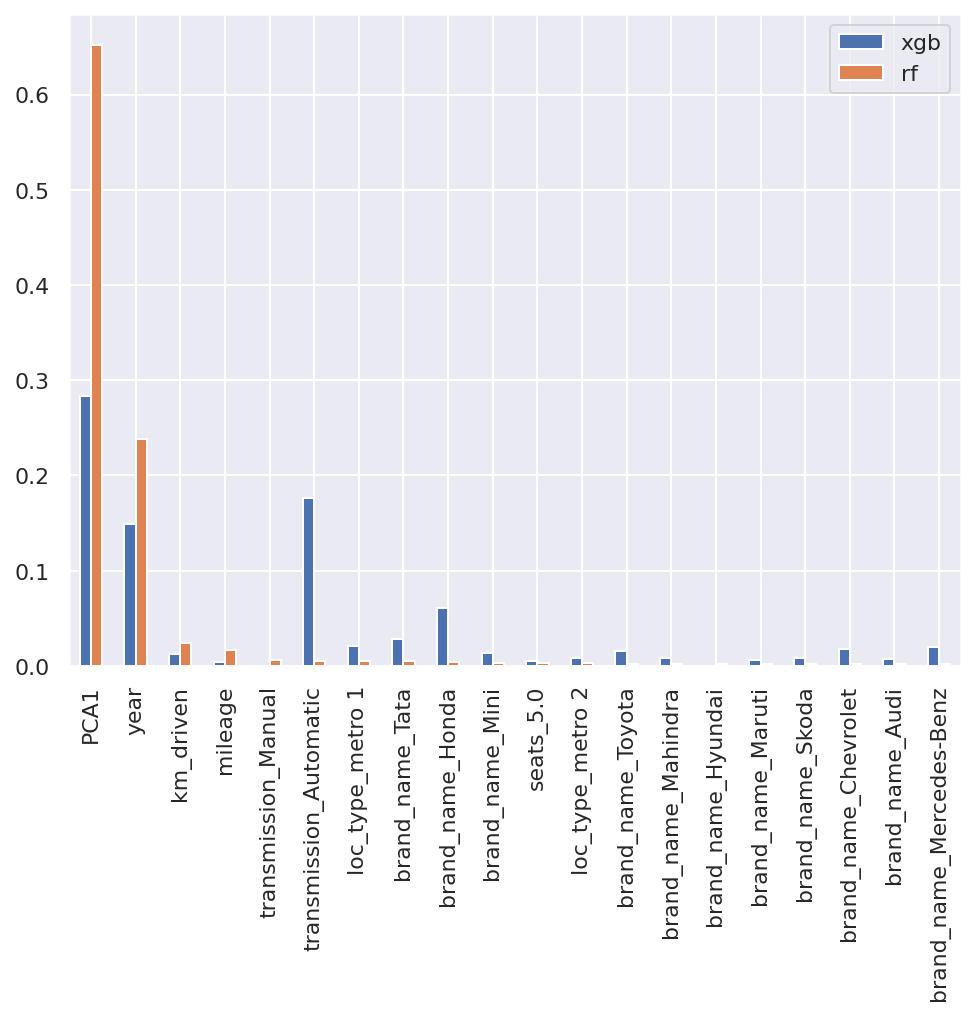

In [63]:
import_df.sort_values(by=['rf'],ascending=False)[:20].plot(kind="bar")

##### RFECV > 38개의 변수 select
* RMSE 대신 비율 개념으로 오차 측정

In [64]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error,make_scorer

def mean_absolute_percentage_error_exp(y_true, y_pred): 
    y_pred[y_pred < 0] = 0
    y_true, y_pred = np.exp(np.array(y_true)-1), np.exp(np.array(y_pred)-1)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
scorer = make_scorer(mean_absolute_percentage_error_exp, greater_is_better=False)

In [65]:
rf = RandomForestRegressor(random_state=42)

selector = RFECV(rf, step = 1, cv = 3, scoring= scorer) # 스텝당 한 개를 제거
selector.fit(x_df, y_log)

RFECV(cv=3,
      estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=None,
                                      oob_score=False, random_state=42,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None,
      scoring=make_scorer(mean_absolute_percentage_error_exp, greater_is_better=False),
      step=1, verbose=0)

Text(0.5, 0, 'Number of Features')

Text(0, 0.5, 'mean_absolute_percentage_error')

Text(0.5, 1.0, 'Feature Selection Scores')

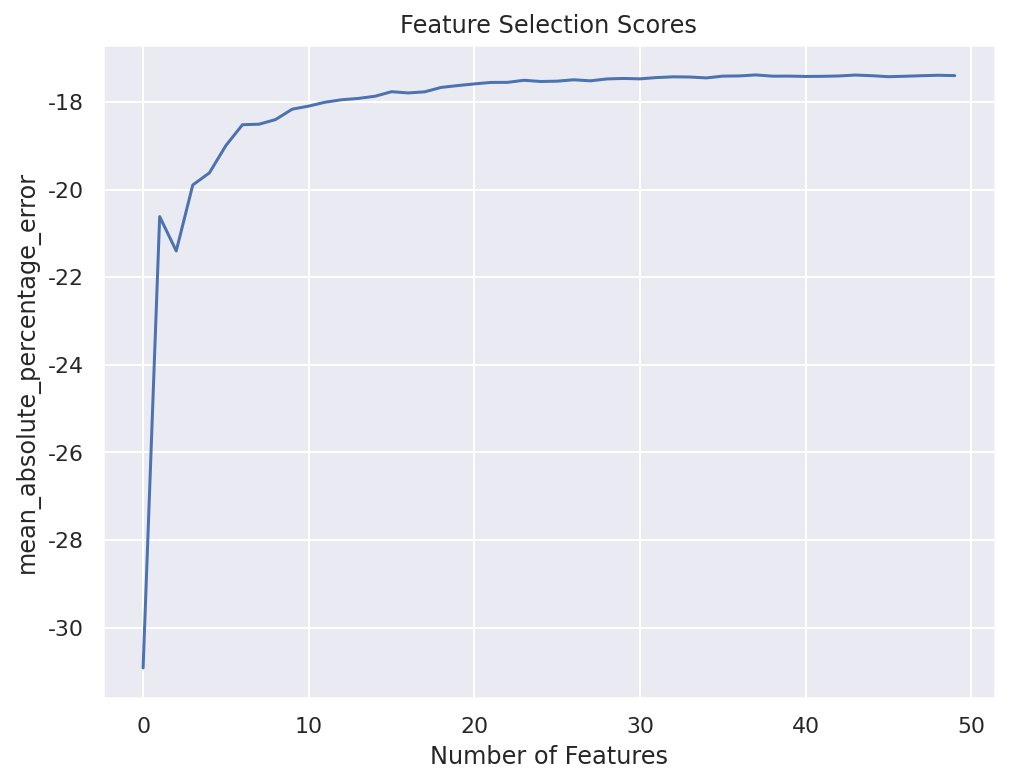

In [66]:
plt.plot(selector.grid_scores_)
plt.xlabel('Number of Features')
plt.ylabel('mean_absolute_percentage_error'); plt.title('Feature Selection Scores')

In [67]:
selector.n_features_

38

In [68]:
att_rankings = pd.DataFrame({'feature': list(x_df.columns), 'rank': list(selector.ranking_)}).sort_values('rank')
att_rankings

,feature,rank
0,PCA1,1
25,brand_name_Ford,1
26,brand_name_Honda,1
27,brand_name_Hyundai,1
30,brand_name_Land Rover,1
31,brand_name_Mahindra,1
32,brand_name_Maruti,1
33,brand_name_Mercedes-Benz,1
34,brand_name_Mini,1
35,brand_name_Mitsubishi,1


In [69]:
x_selected = selector.transform(x_prepared)
selected_features = x_df.columns[np.where(selector.ranking_==1)]
x_selected_df = pd.DataFrame(x_selected, columns = selected_features)

In [70]:
x_selected_df.shape

(6016, 38)

#### Modeling

##### Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [72]:
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    cv_scores = cross_val_score(model, train, train_labels, cv = 5, scoring=scorer)
    print(f'5 Fold CV Score: {round(cv_scores.mean(), 2)}, std: {round(cv_scores.std(), 2)}')

    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [73]:
model_results = cv_model(x_df, y_log, LinearRegression(), 'LR_OLS', model_results)

5 Fold CV Score: -19.12, std: 1.09


In [74]:
model_results = cv_model(x_selected_df, y_log, Lasso(alpha=0.01), 'LR_Lasso_0.01', model_results)

5 Fold CV Score: -24.23, std: 0.59


In [75]:
model_results = cv_model(x_selected_df, y_log, Lasso(alpha=0.1), 'LR_Lasso_0.1', model_results)

5 Fold CV Score: -30.77, std: 0.59


In [76]:
model_results = cv_model(x_selected_df, y_log, SGDRegressor(max_iter=10000, tol=1e-5, penalty=None, random_state=42),
                         'LR_SGD', model_results)

5 Fold CV Score: -20.01, std: 0.56


In [77]:
param_grid = [{"epsilon" : [0.5,1,1.5]}]
model = LinearSVR(random_state=42)
grid_search = GridSearchCV(model,param_grid,cv=3,scoring=scorer)

model_results = cv_model(x_selected_df, y_log, grid_search,'Linear_SVR', model_results)

5 Fold CV Score: -21.01, std: 1.3


In [78]:
param_grid = [{"C" : [10,0.1]}]
model = SVR(kernel="poly", gamma="auto", degree=2)
grid_search = GridSearchCV(model,param_grid,cv=3,scoring=scorer)

model_results = cv_model(x_selected_df, y_log, grid_search,'Kernal_poly_SVR', model_results)

5 Fold CV Score: -18.17, std: 1.5


In [79]:
model_results = cv_model(x_selected_df, y_log, RandomForestRegressor(random_state=42, n_jobs = -1), 'RF', model_results)

5 Fold CV Score: -17.07, std: 0.76


In [80]:
param_grid = [ 
              {"max_depth" : [3,8,10], "eta":[0.02,0.05,0.1],
              'subsample': [0.8,1], 'colsample_bytree': [0.7]}
]

xgb_reg = xgb.XGBRegressor(random_state=42,objective ='reg:squarederror')
grid_search = GridSearchCV(xgb_reg,param_grid,cv=3,
                           scoring=scorer)

grid_search.fit(x_selected_df, y_log)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=42, reg_alpha...1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid=[{'colsample_bytree': [0.7], 'eta': [0.02, 0.05, 0.1],
                          'max_depth': [3, 8, 10], 'subsam

In [81]:
grid_search.best_params_ # 사용자 지정 중 최적 파라미터

{'colsample_bytree': 0.7, 'eta': 0.02, 'max_depth': 10, 'subsample': 0.8}

In [82]:
grid_search.best_estimator_ # 전체 중 최적 파라미터

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.02, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)

In [83]:
model_results = cv_model(x_selected_df, y_log,xgb.XGBRegressor(colsample_bytree=  0.7, eta= 0.02, max_depth= 10, 
                                                       subsample= 1, random_state=42, n_jobs = -1), 'XGB', model_results)

[10:06:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:06:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5 Fold CV Score: -15.39, std: 0.53


In [84]:
model_results

,model,cv_mean,cv_std
0,LR_OLS,-19.117780,1.091015
1,LR_Lasso_0.01,-24.230453,0.593879
2,LR_Lasso_0.1,-30.766488,0.588912
3,LR_SGD,-20.008809,0.557981
4,Linear_SVR,-21.011300,1.304784
5,Kernal_poly_SVR,-18.168984,1.497845
6,RF,-17.074859,0.763544
7,XGB,-15.387599,0.534483


##### Campare Model
* XGB is best

Text(0.5, 1.0, 'Model Compare Results')

Text(0, 0.5, 'MAPE (with error bar)')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

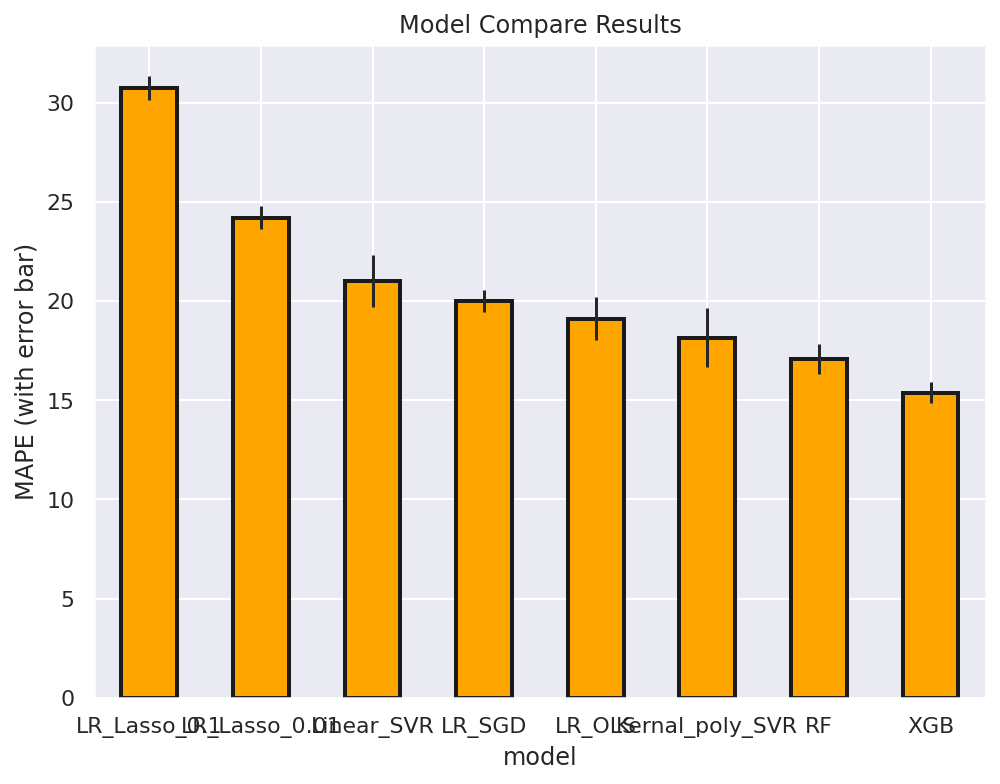

In [85]:
model_results.set_index('model', inplace = True)
model_results=model_results.sort_values("cv_mean")
(model_results['cv_mean']*(-1)).plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model Compare Results');
plt.ylabel('MAPE (with error bar)');
plt.xticks(rotation='horizontal');
model_results.reset_index(inplace = True)

#### Inference

In [86]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

Xt, Xv, yt, yv = train_test_split(x_selected_df,y_log, test_size=0.2, random_state=42)
model = xgb.XGBRegressor(colsample_bytree=  0.7, eta= 0.02, max_depth= 10, subsample= 1, random_state=42, n_jobs = -1)
model.fit(Xt,yt)

[10:06:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.02, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [87]:
model.score(Xv,yv)

0.946346293877278

In [88]:
real_val = round(np.exp(yv-1),2).to_numpy()
predict_val = np.round(np.exp(model.predict(Xv)-1),2)

print(f"real:{real_val[:5].tolist()}, \npredict:{predict_val[:5]}")

real:[1.25, 6.5, 3.9, 4.99, 3.11], 
predict:[1.47 5.59 4.3  5.36 4.02]


#### SHAP: 오뷴류 데이터 검증
* 예측에 실패한 요인 분석

In [89]:
miss_idx = np.argsort((real_val - predict_val) / real_val)[::-1][:10].tolist()
pd.DataFrame({"real":real_val[miss_idx], "pred":predict_val[miss_idx]},index=miss_idx)

,real,pred
220,40.00,7.70
458,83.96,28.24
1108,1.52,0.63
148,75.00,33.34
1158,9.80,4.66
1041,1.60,0.80
678,10.75,5.68
1035,14.45,8.11
964,5.90,3.40
977,4.45,2.58


In [90]:
model.predict(Xv)[miss_idx]

array([3.0406632 , 4.3405943 , 0.53597575, 4.506749  , 2.5387843 ,
       0.7786393 , 2.736965  , 3.0926902 , 2.224741  , 1.9492204 ],
      dtype=float32)

In [91]:
!pip install shap
import shap

In [92]:
# use Kernel SHAP to explain test set predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_selected_df)

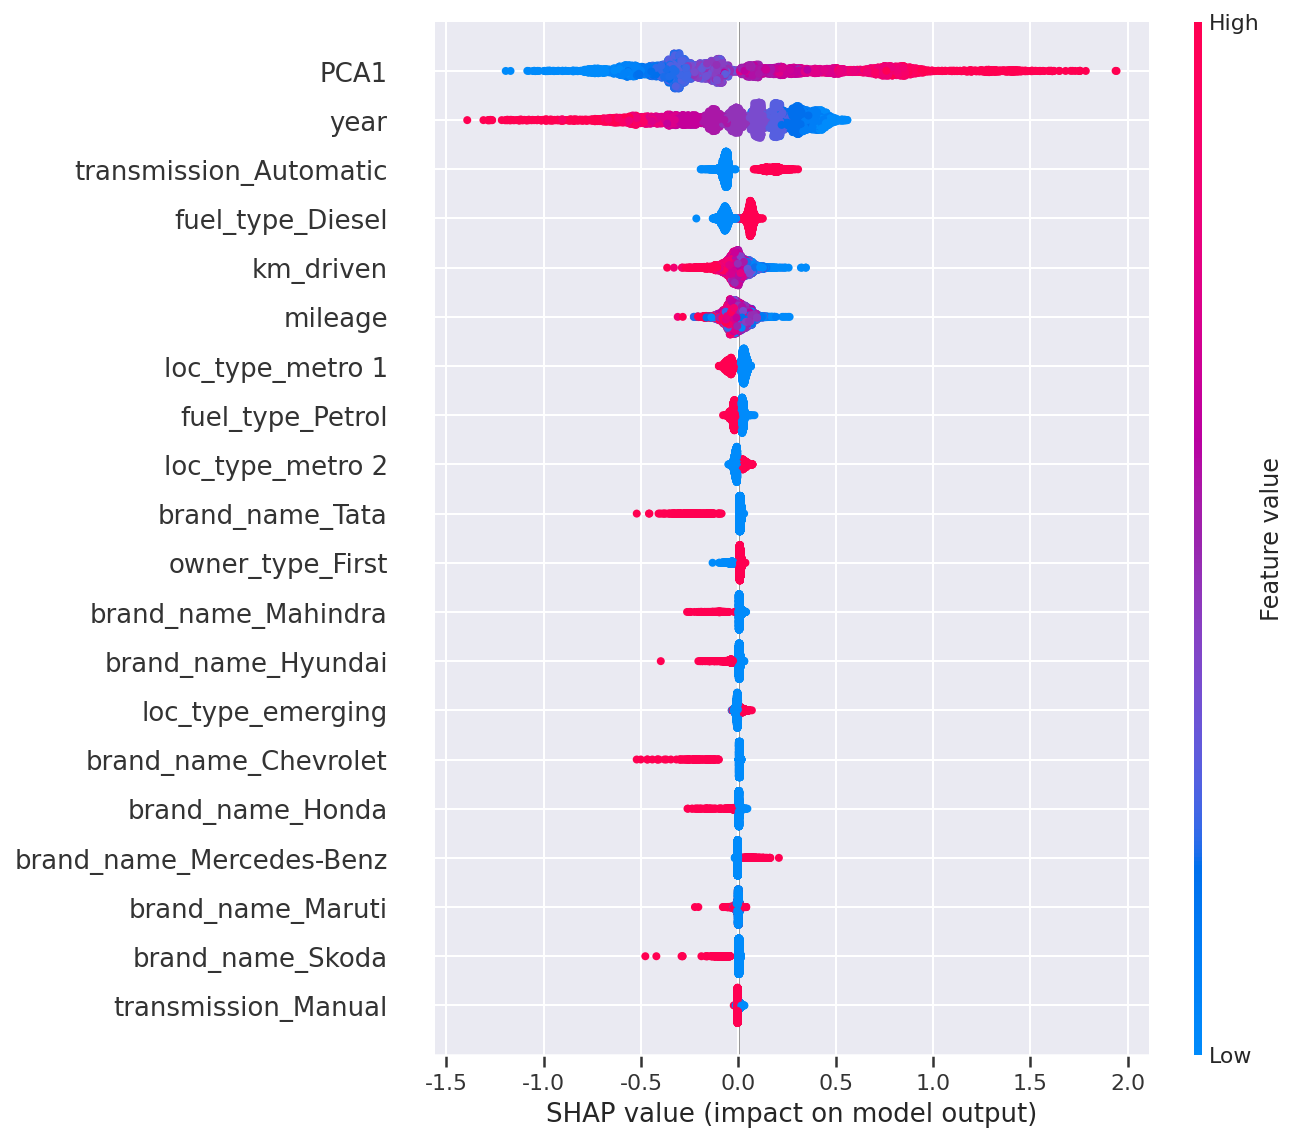

In [93]:
# 변수중요도 그림
shap.summary_plot(shap_values, x_selected_df)

In [94]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], x_selected_df.iloc[0,:])

In [95]:
shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values[Xv.iloc[[miss_idx[0]],].index.values,:],
                x_selected_df.iloc[Xv.iloc[[miss_idx[0]],].index.values,:])

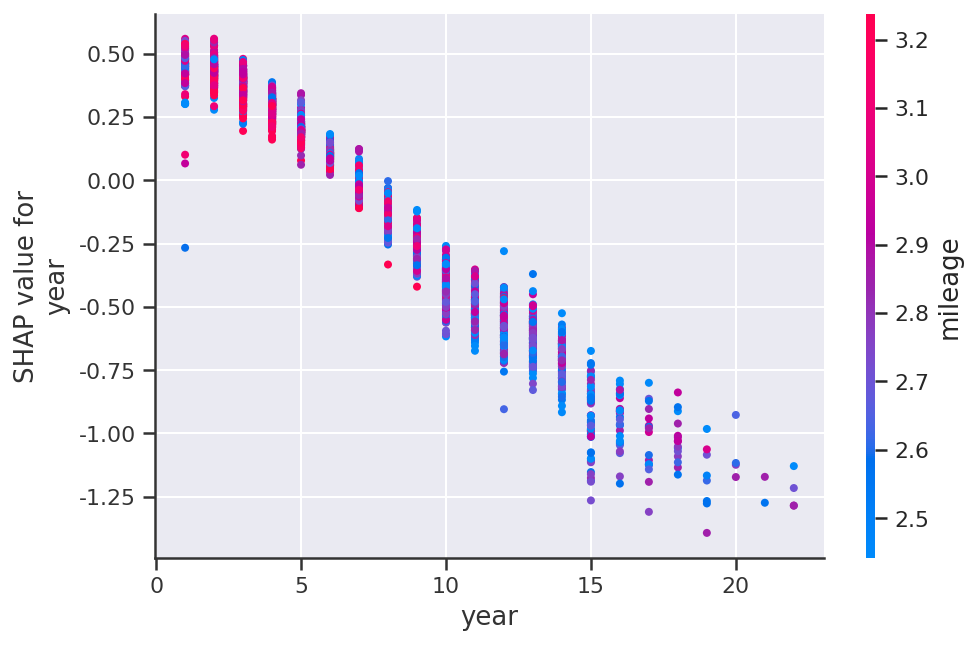

In [96]:
shap.dependence_plot("year", shap_values, x_selected_df, 
                     interaction_index="mileage")

In [97]:
train.iloc[Xv.iloc[[miss_idx[0]],].index.values,]

,name,location,year,km_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,brand_name,car_name,yn_new_price,loc_type
926,Porsche Cayman 2009-2012 S,Hyderabad,10,10000,Petrol,Manual,First,9.0,3436.0,112.706079,2.0,NaN,40.0,Porsche,Cayman,0,metro 2


### Pipeline2, 그대로

In [98]:
raw_num_pipeline = Pipeline([
    ('raw_data_pass', Custom_pass())
])

In [99]:
raw_num_attribs = ['engine', 'power','mileage','km_driven',"year"]
cat_attribs = ['fuel_type',"transmission","owner_type",'seats','brand_name','yn_new_price','loc_type']

full_pipeline = ColumnTransformer([
                                   ("orgin_num", raw_num_pipeline, raw_num_attribs), # 그대로
                                   ("cat", OneHotEncoder(sparse=False), cat_attribs),
])

x_prepared = full_pipeline.fit_transform(x)

In [100]:
x_prepared.shape

(6016, 51)

In [101]:
x_prepared[:1,]

array([[9.980e+02, 5.816e+01, 2.660e+01, 7.200e+04, 1.000e+01, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00]])

In [102]:
y_labels

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: price, Length: 6016, dtype: float64


#### Variable Selection by RFECV

In [103]:
cat_one_hot_attribs = full_pipeline.named_transformers_["cat"].get_feature_names(cat_attribs).tolist()
attributes = raw_num_attribs + cat_one_hot_attribs
attributes

x_df = pd.DataFrame(x_prepared, columns = attributes)

['engine',
 'power',
 'mileage',
 'km_driven',
 'year',
 'fuel_type_Diesel',
 'fuel_type_Gas',
 'fuel_type_Petrol',
 'transmission_Automatic',
 'transmission_Manual',
 'owner_type_First',
 'owner_type_Second',
 'owner_type_Third',
 'seats_2.0',
 'seats_4.0',
 'seats_5.0',
 'seats_6.0',
 'seats_7.0',
 'seats_8.0',
 'seats_9.0',
 'seats_10.0',
 'brand_name_Audi',
 'brand_name_BMW',
 'brand_name_Chevrolet',
 'brand_name_Datsun',
 'brand_name_Fiat',
 'brand_name_Ford',
 'brand_name_Honda',
 'brand_name_Hyundai',
 'brand_name_Jaguar',
 'brand_name_Jeep',
 'brand_name_Land Rover',
 'brand_name_Mahindra',
 'brand_name_Maruti',
 'brand_name_Mercedes-Benz',
 'brand_name_Mini',
 'brand_name_Mitsubishi',
 'brand_name_Nissan',
 'brand_name_Porsche',
 'brand_name_Renault',
 'brand_name_Skoda',
 'brand_name_Tata',
 'brand_name_Toyota',
 'brand_name_Volkswagen',
 'brand_name_Volvo',
 'brand_name_sparse_brand',
 'yn_new_price_0',
 'yn_new_price_1',
 'loc_type_emerging',
 'loc_type_metro 1',
 'loc_type

In [104]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
rf = RandomForestRegressor(random_state=42)

selector = RFECV(rf, step = 1, cv = 3, scoring= scorer) # 스텝당 한 개를 제거
selector.fit(x_df, y_labels)

RFECV(cv=3,
      estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=None,
                                      oob_score=False, random_state=42,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None,
      scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),
      step=1, verbose=0)

Text(0.5, 0, 'Number of Features')

Text(0, 0.5, 'mean_absolute_percentage')

Text(0.5, 1.0, 'Feature Selection Scores')

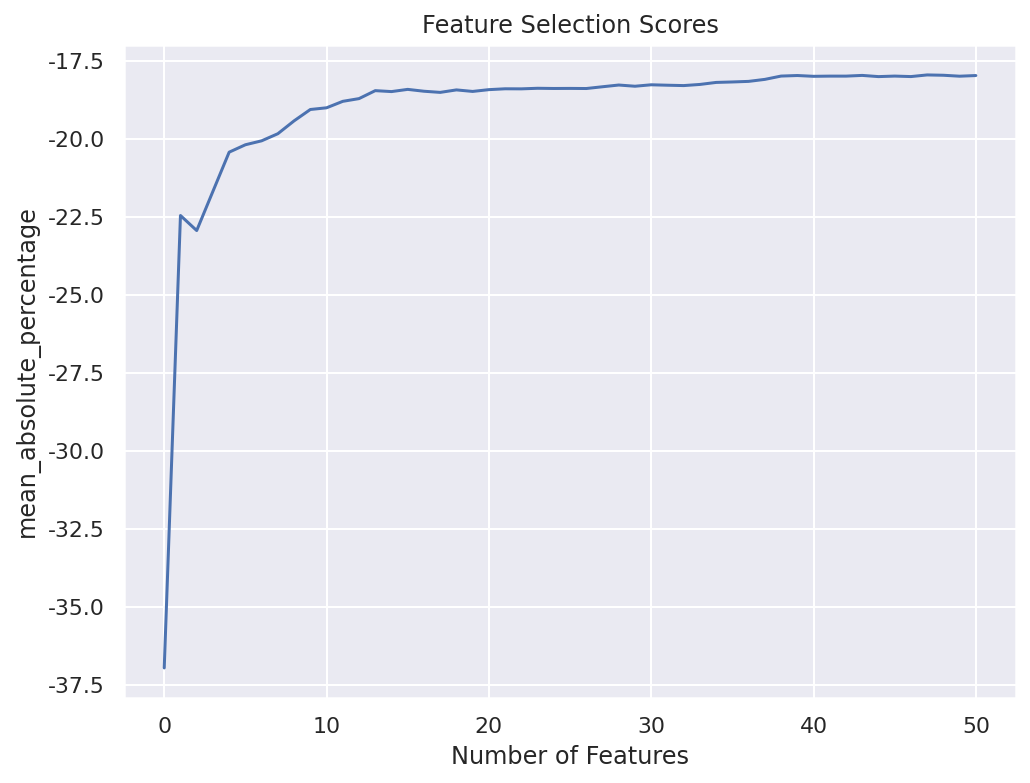

In [105]:
plt.plot(selector.grid_scores_);
plt.xlabel('Number of Features'); plt.ylabel('mean_absolute_percentage'); plt.title('Feature Selection Scores')

In [106]:
selector.n_features_

48

In [107]:
att_rankings = pd.DataFrame({'feature': list(x_df.columns), 'rank': list(selector.ranking_)}).sort_values('rank')
att_rankings

,feature,rank
0,engine,1
27,brand_name_Honda,1
28,brand_name_Hyundai,1
29,brand_name_Jaguar,1
30,brand_name_Jeep,1
31,brand_name_Land Rover,1
32,brand_name_Mahindra,1
33,brand_name_Maruti,1
34,brand_name_Mercedes-Benz,1
35,brand_name_Mini,1


In [108]:
x_selected = selector.transform(x_prepared)
selected_features = x_df.columns[np.where(selector.ranking_==1)]
x_selected_df = pd.DataFrame(x_selected, columns = selected_features)

In [109]:
x_selected_df.shape

(6016, 48)

#### Modeling

##### Cross Validation

In [110]:
model_results_pipe2 = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    cv_scores = cross_val_score(model, train, train_labels, cv = 5, scoring=scorer)
    # cv_scores = cross_val_score(model, train, train_labels, cv = 5, scoring="neg_mean_squared_error")
    print(f'5 Fold CV Score: {round(cv_scores.mean(), 2)}, std: {round(cv_scores.std(), 2)}')

    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [111]:
model_results_pipe2 = cv_model(x_selected_df, y_labels, LinearRegression(), 'LR', model_results_pipe2)

5 Fold CV Score: -56.03, std: 4.23


In [112]:
model_results_pipe2 = cv_model(x_selected_df, y_labels, Lasso(alpha=0.01), 'Lasso_0.01', model_results_pipe2)

5 Fold CV Score: -57.12, std: 4.14


In [113]:
model_results_pipe2 = cv_model(x_selected_df, y_labels, Lasso(alpha=0.1), 'LR_Lasso_0.1', model_results_pipe2)

5 Fold CV Score: -68.14, std: 2.87


In [114]:
model_results_pipe2 = cv_model(x_selected_df, y_labels, SGDRegressor(max_iter=10000, tol=1e-5, penalty=None, random_state=42),
                         'LR_SGD', model_results_pipe2)

5 Fold CV Score: -1.739012922688397e+19, std: 1.5926894709829313e+19


In [115]:
param_grid = [{"epsilon" : [0.5,1,1.5]}]
model = LinearSVR(random_state=42)
grid_search = GridSearchCV(model,param_grid,cv=3,scoring=scorer)

model_results_pipe2 = cv_model(x_selected_df, y_labels, grid_search,'Linear_SVR', model_results_pipe2)

5 Fold CV Score: -117.23, std: 62.96


In [116]:
## too long
# model = SVR(C=10, kernel="poly", gamma="auto", degree=2)
# grid_search = GridSearchCV(model,param_grid,cv=3,scoring=scorer)

# model_results_pipe2 = cv_model(x_selected_df, y_labels, grid_search,'Kernal_poly_SVR', model_results_pipe2)

In [117]:
model_results_pipe2 = cv_model(x_selected_df, y_labels, RandomForestRegressor(random_state=42, n_jobs = -1), 'RF', model_results_pipe2)

5 Fold CV Score: -17.61, std: 0.86


In [118]:
param_grid = [ 
              {"max_depth" : [3,8,10], "eta":[0.02,0.05,0.1],
              'subsample': [0.8,1], 'colsample_bytree': [0.7]}
]

xgb_reg = xgb.XGBRegressor(random_state=42,objective ='reg:squarederror')
grid_search = GridSearchCV(xgb_reg,param_grid,cv=3,
                           scoring=scorer)

grid_search.fit(x_selected_df, y_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=42, reg_alpha...bda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid=[{'colsample_bytree': [0.7], 'eta': [0.02, 0.05, 0.1],
                          'max_depth': [3, 8, 10], 'su

In [119]:
grid_search.best_params_ # 사용자 지정 중 최적 파라미터

{'colsample_bytree': 0.7, 'eta': 0.02, 'max_depth': 10, 'subsample': 1}

In [120]:
grid_search.best_estimator_ # 전체 중 최적 파라미터

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.02, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [121]:
model_results_pipe2 = cv_model(x_selected_df, y_labels, xgb.XGBRegressor(colsample_bytree=  0.7, eta= 0.02, max_depth= 10, 
                                                       subsample= 0.8, random_state=42, n_jobs = -1), 'XGB', model_results_pipe2)

[10:13:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5 Fold CV Score: -16.48, std: 0.94


In [122]:
model_results_pipe2

,model,cv_mean,cv_std
0,LR,-5.602993e+01,4.232671e+00
1,Lasso_0.01,-5.712021e+01,4.139449e+00
2,LR_Lasso_0.1,-6.814213e+01,2.874234e+00
3,LR_SGD,-1.739013e+19,1.592689e+19
4,Linear_SVR,-1.172267e+02,6.295546e+01
5,RF,-1.761186e+01,8.647153e-01
6,XGB,-1.648478e+01,9.429485e-01


In [123]:
model_results_pipe2[1:]

,model,cv_mean,cv_std
1,Lasso_0.01,-5.712021e+01,4.139449e+00
2,LR_Lasso_0.1,-6.814213e+01,2.874234e+00
3,LR_SGD,-1.739013e+19,1.592689e+19
4,Linear_SVR,-1.172267e+02,6.295546e+01
5,RF,-1.761186e+01,8.647153e-01
6,XGB,-1.648478e+01,9.429485e-01


In [124]:
model_results

,model,cv_mean,cv_std
0,LR_Lasso_0.1,-30.766488,0.588912
1,LR_Lasso_0.01,-24.230453,0.593879
2,Linear_SVR,-21.011300,1.304784
3,LR_SGD,-20.008809,0.557981
4,LR_OLS,-19.117780,1.091015
5,Kernal_poly_SVR,-18.168984,1.497845
6,RF,-17.074859,0.763544
7,XGB,-15.387599,0.534483


##### Compare Model

Text(0.5, 1.0, 'Model Compare Results')

Text(0, 0.5, 'MAPE (with error bar)')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

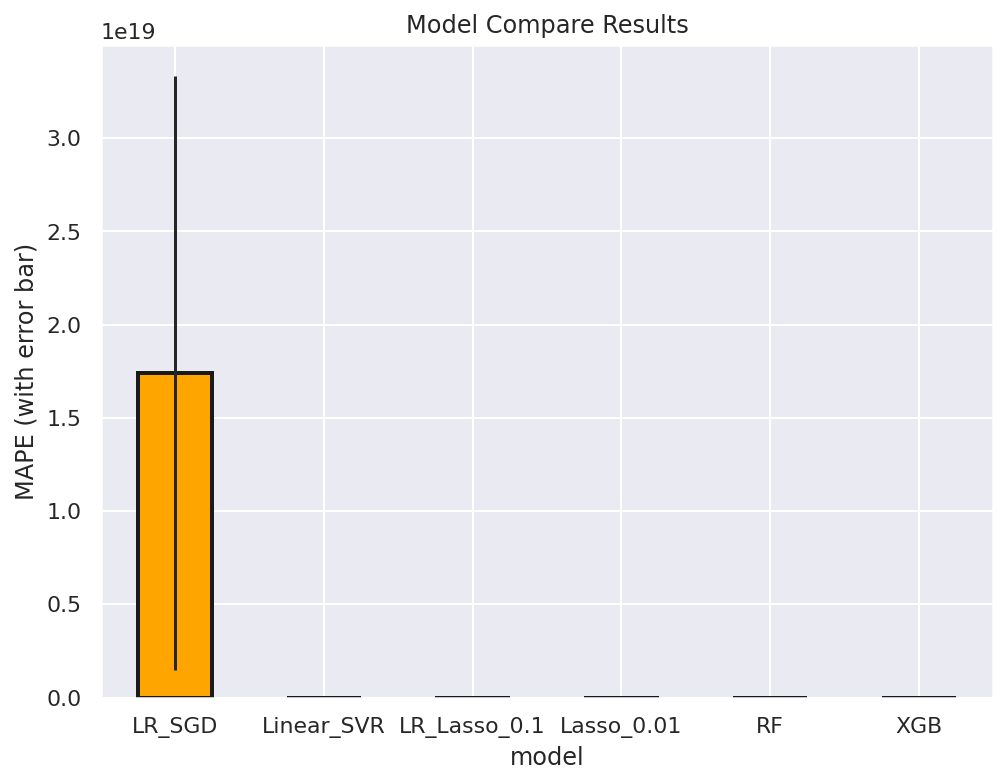

In [125]:
model_results_pipe2.set_index('model', inplace = True)
model_results_pipe2=model_results_pipe2[1:].sort_values("cv_mean")
(model_results_pipe2['cv_mean']*(-1)).plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results_pipe2['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model Compare Results');
plt.ylabel('MAPE (with error bar)');
plt.xticks(rotation='horizontal');
model_results_pipe2.reset_index(inplace = True)

*   scale 조절해준, pipe1에서 linear model 훨씬 더 좋음
*   Tree base 모델은 결과가 비슷하나 pipe1의 XGB가 best
